In [48]:
#__IMPORTAMOS TODAS LAS LIBRERIAS NECESARIAS__
import pandas as pd
import csv
import requests
import re
import ast
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import numpy as np
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
from numpy import var
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import math
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [49]:
### Descargamos una tabla de valores de la API de Binance (Binance es un CEX de criptomonedas)
# Vamos a solicitar el valor de Bitcoin en US$ durante una franja de tiempo
# Pedimos el dato con una resolución de 15 minutos, y un número máximo de 10 resultados

APIurl = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1d&limit=365&startTime=1483228800000&endTime=1667606340000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
APIresp.text

True
200
0:00:00.349853


'[[1502928000000,"4261.48000000","4485.39000000","4200.74000000","4285.08000000","795.15037700",1503014399999,"3454770.05073206",3427,"616.24854100","2678216.40060401","0"],[1503014400000,"4285.08000000","4371.52000000","3938.77000000","4108.37000000","1199.88826400",1503100799999,"5086958.30617151",5233,"972.86871000","4129123.31651808","0"],[1503100800000,"4108.37000000","4184.69000000","3850.00000000","4139.98000000","381.30976300",1503187199999,"1549483.73542151",2153,"274.33604200","1118001.87008735","0"],[1503187200000,"4120.98000000","4211.08000000","4032.62000000","4086.29000000","467.08302200",1503273599999,"1930364.39032646",2321,"376.79594700","1557401.33373730","0"],[1503273600000,"4069.13000000","4119.62000000","3911.79000000","4016.00000000","691.74306000",1503359999999,"2797231.71402728",3972,"557.35610700","2255662.55315837","0"],[1503360000000,"4016.00000000","4104.82000000","3400.00000000","4040.00000000","966.68485800",1503446399999,"3752505.77214051",6494,"423.99518

In [50]:
# Parse string as an array (matrix, list of lists)
x = ast.literal_eval(APIresp.text)

# Convert array into dataFrame
df = pd.DataFrame(x)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,1534032000000,6222.55000000,6472.30000000,6130.00000000,6308.33000000,38567.77071200,1534118399999,243227298.87942723,190399,20954.74731400,132190051.41706526,0
361,1534118400000,6308.56000000,6545.00000000,6145.04000000,6246.35000000,53895.82878300,1534204799999,341552293.00730005,239602,29517.27626900,187178430.28020313,0
362,1534204800000,6248.25000000,6250.33000000,5880.00000000,6188.08000000,50186.74509100,1534291199999,303179556.36245032,252004,25530.65349800,154285607.85051606,0
363,1534291200000,6188.08000000,6609.00000000,6172.11000000,6267.16000000,68806.68702600,1534377599999,439109005.40343039,329413,37144.04216800,237077628.52971667,0


In [51]:
df_new = df.drop([2, 3, 4, 5, 6, 7, 8, 9, 10], axis=1)


In [52]:
type(df_new[0])


pandas.core.series.Series

In [53]:
df = df_new[[0, 1]]
# dataFrame column assignments throw warnings. We avoid them
pd.options.mode.chained_assignment = None  # default='warn'

# Rename dataFrame columns
df.rename( columns={0 :'time'}, inplace=True)
df.rename( columns={1 :'price'}, inplace=True)

# Convert string to float
print (df.dtypes)
df.price = df.price.astype(float)
print (df.dtypes)

df

time      int64
price    object
dtype: object
time       int64
price    float64
dtype: object


,time,price
0,1502928000000,4261.48
1,1503014400000,4285.08
2,1503100800000,4108.37
3,1503187200000,4120.98
4,1503273600000,4069.13
...,...,...
360,1534032000000,6222.55
361,1534118400000,6308.56
362,1534204800000,6248.25
363,1534291200000,6188.08


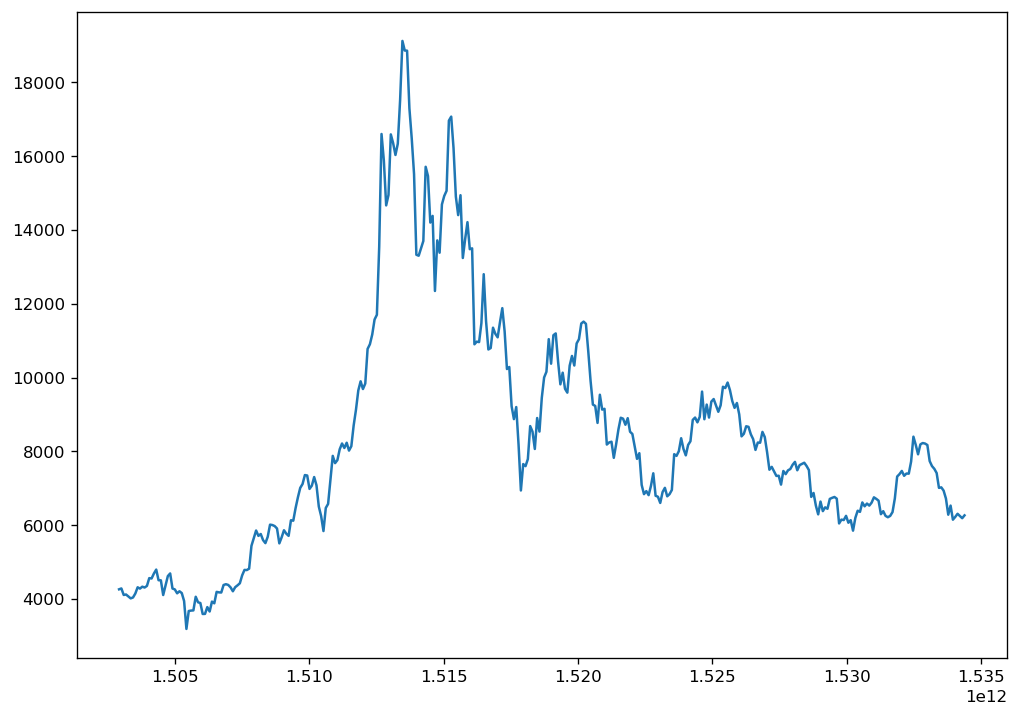

In [54]:
plt.plot(df["time"],df["price"])
plt.show()

          time    price
0   2017-08-17  4261.48
1   2017-08-18  4285.08
2   2017-08-19  4108.37
3   2017-08-20  4120.98
4   2017-08-21  4069.13
..         ...      ...
360 2018-08-12  6222.55
361 2018-08-13  6308.56
362 2018-08-14  6248.25
363 2018-08-15  6188.08
364 2018-08-16  6265.27

[365 rows x 2 columns]


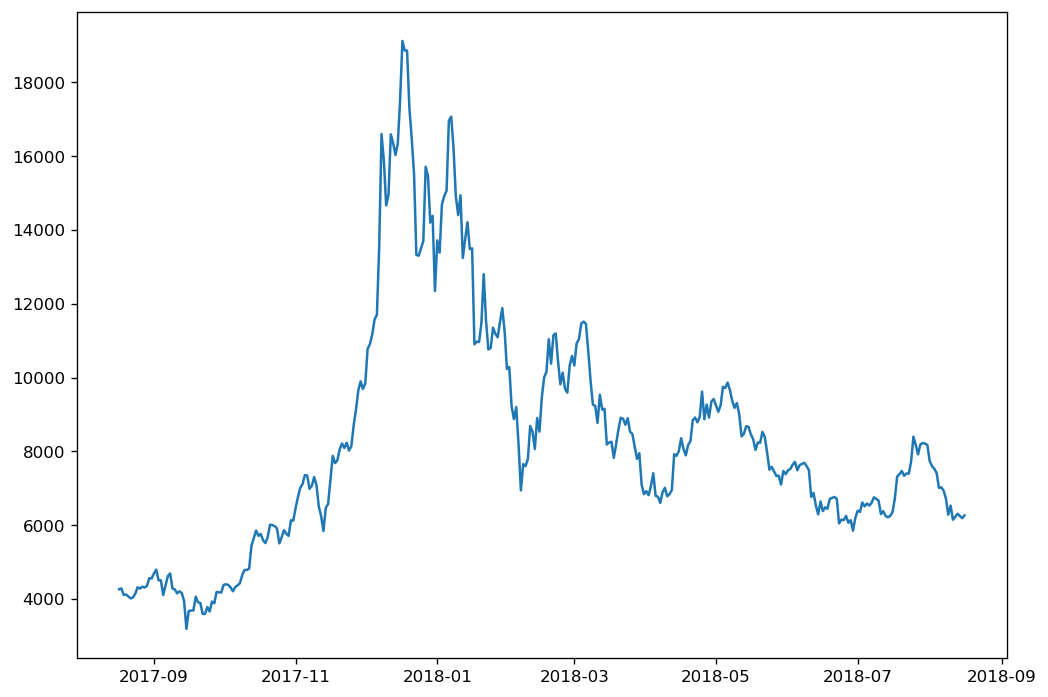

In [55]:
posix_epoch = datetime(1970, 1, 1)
df['time'] = df['time'].apply(lambda x: posix_epoch + timedelta(seconds = x/1000))
print(df)

# Draw chart of Bitcoin price evolution
plt.plot(df['time'],df['price'])

In [56]:
APIurl1 = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1d&limit=1000&startTime=1589328000000&endTime=1674000000000"
APIresp1 = requests.get(APIurl1)
print(APIresp1.ok)
print(APIresp1.status_code)
print(APIresp1.elapsed)
APIresp1.text

True
200
0:00:00.440067


'[[1589328000000,"8810.99000000","9398.00000000","8792.99000000","9309.37000000","92466.27401800",1589414399999,"839725719.96020766",869216,"43648.35465500","396713970.04433138","0"],[1589414400000,"9309.35000000","9939.00000000","9256.76000000","9791.98000000","129565.37747000",1589500799999,"1247456797.81366625",1199530,"63438.51099300","611313934.39132358","0"],[1589500800000,"9791.97000000","9845.62000000","9150.00000000","9316.42000000","115890.76151600",1589587199999,"1099721375.89190578",1055630,"55397.12343400","525813199.33664916","0"],[1589587200000,"9315.96000000","9588.00000000","9220.00000000","9381.27000000","59587.62786200",1589673599999,"560547005.02590862",692028,"28861.36820000","271542836.21380133","0"],[1589673600000,"9380.81000000","9888.00000000","9322.10000000","9680.04000000","68647.76432300",1589759999999,"663088800.81527807",722718,"34734.03499300","335478915.97643693","0"],[1589760000000,"9681.11000000","9950.00000000","9464.23000000","9733.93000000","82006.6

In [57]:
# Parse string as an array (matrix, list of lists)
x = ast.literal_eval(APIresp1.text)

# Convert array into dataFrame
df1 = pd.DataFrame(x)
df1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1589328000000,8810.99000000,9398.00000000,8792.99000000,9309.37000000,92466.27401800,1589414399999,839725719.96020766,869216,43648.35465500,396713970.04433138,0
1,1589414400000,9309.35000000,9939.00000000,9256.76000000,9791.98000000,129565.37747000,1589500799999,1247456797.81366625,1199530,63438.51099300,611313934.39132358,0
2,1589500800000,9791.97000000,9845.62000000,9150.00000000,9316.42000000,115890.76151600,1589587199999,1099721375.89190578,1055630,55397.12343400,525813199.33664916,0
3,1589587200000,9315.96000000,9588.00000000,9220.00000000,9381.27000000,59587.62786200,1589673599999,560547005.02590862,692028,28861.36820000,271542836.21380133,0
4,1589673600000,9380.81000000,9888.00000000,9322.10000000,9680.04000000,68647.76432300,1589759999999,663088800.81527807,722718,34734.03499300,335478915.97643693,0
...,...,...,...,...,...,...,...,...,...,...,...,...
976,1673654400000,19930.01000000,21258.00000000,19888.05000000,20954.92000000,393913.74951000,1673740799999,8183071567.04618820,8659545,197817.55209000,4109568162.17041980,0
977,1673740800000,20952.76000000,21050.74000000,20551.01000000,20871.50000000,178542.22549000,1673827199999,3710526606.13896440,5194354,88310.83908000,1835436631.70387060,0
978,1673827200000,20872.99000000,21474.05000000,20611.48000000,21185.65000000,293078.08262000,1673913599999,6168654053.04263760,6856434,145352.66942000,3059597458.38535250,0
979,1673913600000,21185.65000000,21647.45000000,20841.31000000,21134.81000000,275407.74409000,1673999999999,5840585769.49009330,6440138,137121.64311000,2908227174.24903050,0


In [58]:
# Filter out all data except timestamp and 1st valuation (Columns #0 and #1)
df1 = df1[[0, 1]]

# dataFrame column assignments throw warnings. We avoid them
pd.options.mode.chained_assignment = None  # default='warn'

# Rename dataFrame columns
df1.rename( columns={0 :'time'}, inplace=True)
df1.rename( columns={1 :'price'}, inplace=True)

# Convert string to float
print (df1.dtypes)
df1.price = df1.price.astype(float)
print (df1.dtypes)

df1

time      int64
price    object
dtype: object
time       int64
price    float64
dtype: object


,time,price
0,1589328000000,8810.99
1,1589414400000,9309.35
2,1589500800000,9791.97
3,1589587200000,9315.96
4,1589673600000,9380.81
...,...,...
976,1673654400000,19930.01
977,1673740800000,20952.76
978,1673827200000,20872.99
979,1673913600000,21185.65


In [59]:
posix_epoch = datetime(1970, 1, 1)
df1['time'] = df1['time'].apply(lambda x: posix_epoch + timedelta(seconds = x/1000))
print(df1)

          time     price
0   2020-05-13   8810.99
1   2020-05-14   9309.35
2   2020-05-15   9791.97
3   2020-05-16   9315.96
4   2020-05-17   9380.81
..         ...       ...
976 2023-01-14  19930.01
977 2023-01-15  20952.76
978 2023-01-16  20872.99
979 2023-01-17  21185.65
980 2023-01-18  21132.29

[981 rows x 2 columns]


In [60]:
APIurl2 = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1d&limit=1000&startTime=1534464000000&endTime=1589241600000"
APIresp2 = requests.get(APIurl2)
print(APIresp2.ok)
print(APIresp2.status_code)
print(APIresp2.elapsed)
APIresp2.text

True
200
0:00:00.400356


'[[1534464000000,"6316.00000000","6585.00000000","6285.40000000","6584.49000000","57851.61080300",1534550399999,"374472431.72358120",296730,"32407.88455200","209831423.42862131","0"],[1534550400000,"6579.04000000","6620.00000000","6288.00000000","6387.96000000","53742.32217200",1534636799999,"345964004.36572125",276121,"29469.81048500","189808853.55518274","0"],[1534636800000,"6387.96000000","6541.00000000","6300.00000000","6477.53000000","45190.84799400",1534723199999,"289271954.55326532",190758,"25368.61327200","162405728.97807813","0"],[1534723200000,"6477.53000000","6530.00000000","6220.00000000","6254.84000000","49435.55526000",1534809599999,"317617945.74926080",237055,"26468.01709100","170185693.09984116","0"],[1534809600000,"6251.00000000","6500.00000000","6235.08000000","6480.00000000","41569.94740800",1534895999999,"265458342.78172061",180578,"23219.82397300","148276323.26185246","0"],[1534896000000,"6479.98000000","6882.54000000","6251.20000000","6360.89000000","77909.3913590

In [61]:
# Parse string as an array (matrix, list of lists)
x = ast.literal_eval(APIresp2.text)

# Convert array into dataFrame
df2 = pd.DataFrame(x)
df2

,0,1,2,3,4,5,6,7,8,9,10,11
0,1534464000000,6316.00000000,6585.00000000,6285.40000000,6584.49000000,57851.61080300,1534550399999,374472431.72358120,296730,32407.88455200,209831423.42862131,0
1,1534550400000,6579.04000000,6620.00000000,6288.00000000,6387.96000000,53742.32217200,1534636799999,345964004.36572125,276121,29469.81048500,189808853.55518274,0
2,1534636800000,6387.96000000,6541.00000000,6300.00000000,6477.53000000,45190.84799400,1534723199999,289271954.55326532,190758,25368.61327200,162405728.97807813,0
3,1534723200000,6477.53000000,6530.00000000,6220.00000000,6254.84000000,49435.55526000,1534809599999,317617945.74926080,237055,26468.01709100,170185693.09984116,0
4,1534809600000,6251.00000000,6500.00000000,6235.08000000,6480.00000000,41569.94740800,1534895999999,265458342.78172061,180578,23219.82397300,148276323.26185246,0
...,...,...,...,...,...,...,...,...,...,...,...,...
630,1588896000000,9986.30000000,10035.96000000,9705.00000000,9800.01000000,100683.79640000,1588982399999,997005843.74047920,967816,46207.63759400,457701324.85886588,0
631,1588982400000,9800.02000000,9914.25000000,9520.00000000,9539.40000000,81950.67956700,1589068799999,795001351.67970229,839384,36738.67924400,356475632.65892539,0
632,1589068800000,9539.10000000,9574.83000000,8117.00000000,8722.77000000,183865.18202800,1589155199999,1594996476.97563696,1565771,84376.58077400,731417660.35199514,0
633,1589155200000,8722.77000000,9168.00000000,8200.00000000,8561.52000000,168807.25183200,1589241599999,1468392820.76080359,1367382,81474.59506700,708958944.15865879,0


In [62]:
# Filter out all data except timestamp and 1st valuation (Columns #0 and #1)
df2 = df2[[0, 1]]

# dataFrame column assignments throw warnings. We avoid them
pd.options.mode.chained_assignment = None  # default='warn'

# Rename dataFrame columns
df2.rename( columns={0 :'time'}, inplace=True)
df2.rename( columns={1 :'price'}, inplace=True)

# Convert string to float
print (df2.dtypes)
df2.price = df2.price.astype(float)
print (df2.dtypes)

df2

time      int64
price    object
dtype: object
time       int64
price    float64
dtype: object


,time,price
0,1534464000000,6316.00
1,1534550400000,6579.04
2,1534636800000,6387.96
3,1534723200000,6477.53
4,1534809600000,6251.00
...,...,...
630,1588896000000,9986.30
631,1588982400000,9800.02
632,1589068800000,9539.10
633,1589155200000,8722.77


In [63]:
posix_epoch = datetime(1970, 1, 1)
df2['time'] = df2['time'].apply(lambda x: posix_epoch + timedelta(seconds = x/1000))
print(df2)

          time    price
0   2018-08-17  6316.00
1   2018-08-18  6579.04
2   2018-08-19  6387.96
3   2018-08-20  6477.53
4   2018-08-21  6251.00
..         ...      ...
630 2020-05-08  9986.30
631 2020-05-09  9800.02
632 2020-05-10  9539.10
633 2020-05-11  8722.77
634 2020-05-12  8562.04

[635 rows x 2 columns]


In [64]:
# CONCATENAMOS LOS DOS DATAFRAME
dfn = pd.concat([df, df2], ignore_index=True)
dfn

,time,price
0,2017-08-17,4261.48
1,2017-08-18,4285.08
2,2017-08-19,4108.37
3,2017-08-20,4120.98
4,2017-08-21,4069.13
...,...,...
995,2020-05-08,9986.30
996,2020-05-09,9800.02
997,2020-05-10,9539.10
998,2020-05-11,8722.77


In [65]:
# CONCATENAMOS LOS DOS DATAFRAME
dff = pd.concat([dfn, df1], ignore_index=True)
dff

,time,price
0,2017-08-17,4261.48
1,2017-08-18,4285.08
2,2017-08-19,4108.37
3,2017-08-20,4120.98
4,2017-08-21,4069.13
...,...,...
1976,2023-01-14,19930.01
1977,2023-01-15,20952.76
1978,2023-01-16,20872.99
1979,2023-01-17,21185.65


In [66]:
dff.dtypes

time     datetime64[ns]
price           float64
dtype: object

In [67]:
dff.index = pd.DatetimeIndex(dff["time"])
dff

,time,price
time,,
2017-08-17,2017-08-17,4261.48
2017-08-18,2017-08-18,4285.08
2017-08-19,2017-08-19,4108.37
2017-08-20,2017-08-20,4120.98
2017-08-21,2017-08-21,4069.13
...,...,...
2023-01-14,2023-01-14,19930.01
2023-01-15,2023-01-15,20952.76
2023-01-16,2023-01-16,20872.99


In [68]:
dff.dtypes

time     datetime64[ns]
price           float64
dtype: object

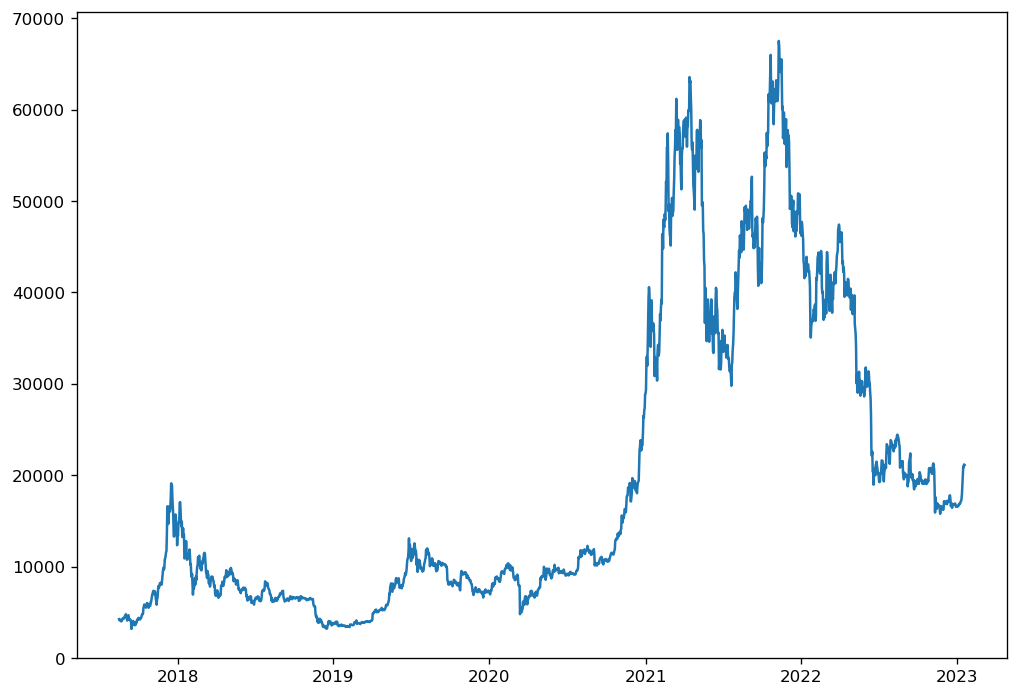

In [69]:
# Draw chart of Bitcoin price evolution
plt.plot(dff['time'],dff['price'])
plt.show()

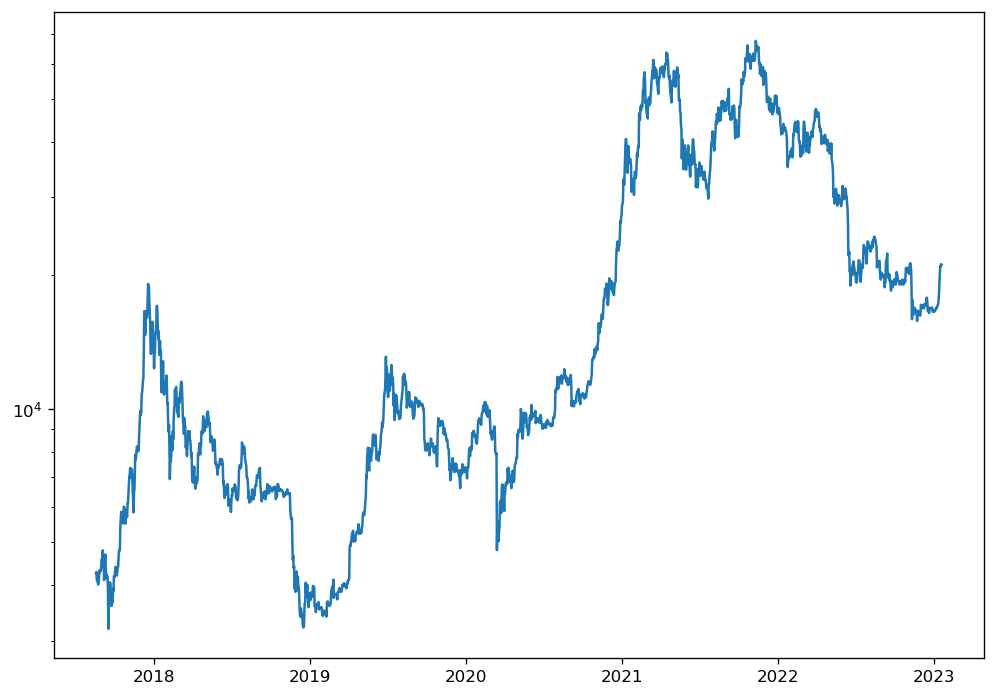

In [70]:
fig, ax = plt.subplots()
ax.plot(dff["time"], dff["price"])
ax.set_yscale("log")
plt.show()

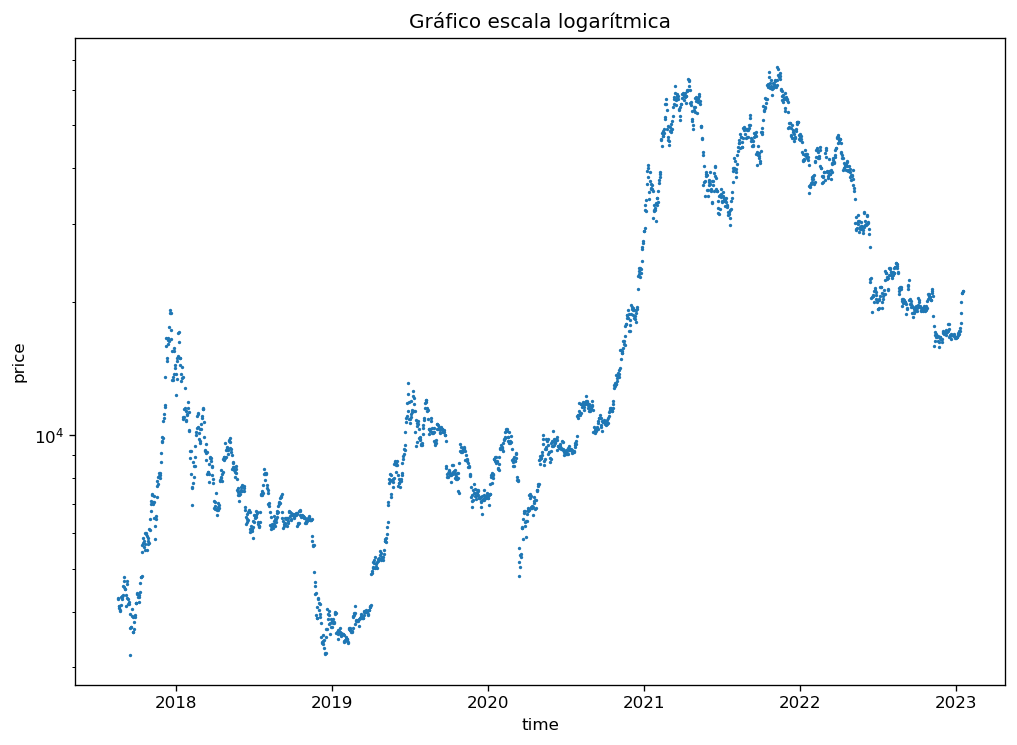

In [71]:
fig, ax = plt.subplots()
ax.scatter(dff["time"], dff["price"], s=1)
ax.set_xlabel("time")
ax.set_ylabel("price")
ax.set_title("Gráfico escala logarítmica")
ax.set_yscale("log")
plt.show()

In [72]:
# Grabamos este dataframe en un CSV
CSVfilename = "dff.csv"
dff.to_csv(CSVfilename, encoding='utf-8', index=False, quoting=csv.QUOTE_ALL)

## Llamamos nuestro datadrame desde el CSV que habiamos guardado de la API

In [39]:
# podemos llamar con nuestro csv el dataset para que la Api si algun dia falla, no nos dañe el proyecto
dff = pd.read_csv('dff.csv')

In [40]:
dff.time = pd.to_datetime(dff.time)

In [73]:
dff

,time,price
time,,
2017-08-17,2017-08-17,4261.48
2017-08-18,2017-08-18,4285.08
2017-08-19,2017-08-19,4108.37
2017-08-20,2017-08-20,4120.98
2017-08-21,2017-08-21,4069.13
...,...,...
2023-01-14,2023-01-14,19930.01
2023-01-15,2023-01-15,20952.76
2023-01-16,2023-01-16,20872.99


In [74]:
dff["varianza"] = dff["price"].diff()

In [75]:
dff

,time,price,varianza
time,,,
2017-08-17,2017-08-17,4261.48,NaN
2017-08-18,2017-08-18,4285.08,23.60
2017-08-19,2017-08-19,4108.37,-176.71
2017-08-20,2017-08-20,4120.98,12.61
2017-08-21,2017-08-21,4069.13,-51.85
...,...,...,...
2023-01-14,2023-01-14,19930.01,1083.39
2023-01-15,2023-01-15,20952.76,1022.75
2023-01-16,2023-01-16,20872.99,-79.77


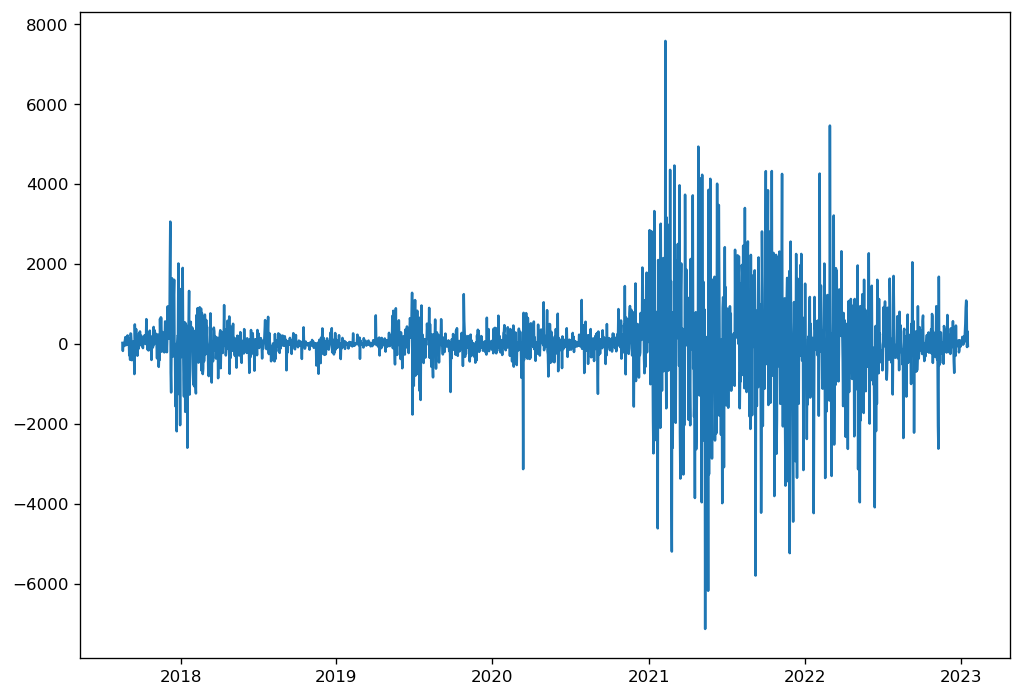

In [76]:
plt.plot(dff["varianza"])
plt.show()

In [77]:
dff["varianzaRelati"] = dff["varianza"] / dff["price"]
dff

,time,price,varianza,varianzaRelati
time,,,,
2017-08-17,2017-08-17,4261.48,NaN,NaN
2017-08-18,2017-08-18,4285.08,23.60,0.005507
2017-08-19,2017-08-19,4108.37,-176.71,-0.043012
2017-08-20,2017-08-20,4120.98,12.61,0.003060
2017-08-21,2017-08-21,4069.13,-51.85,-0.012742
...,...,...,...,...
2023-01-14,2023-01-14,19930.01,1083.39,0.054360
2023-01-15,2023-01-15,20952.76,1022.75,0.048812
2023-01-16,2023-01-16,20872.99,-79.77,-0.003822


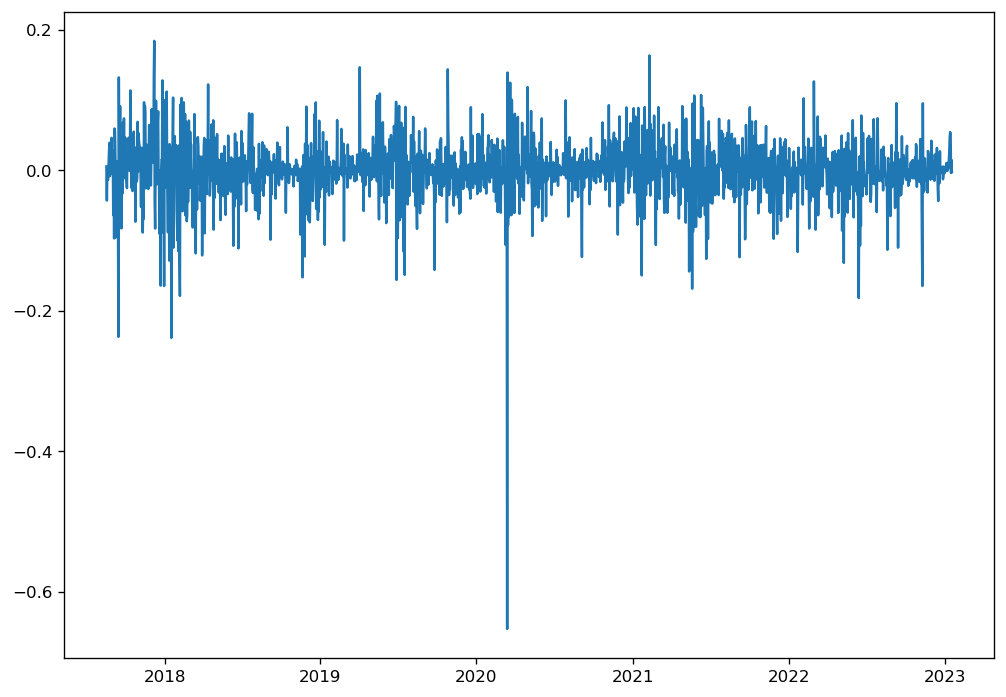

In [78]:
plt.plot(dff["time"], dff["varianzaRelati"])
plt.show()

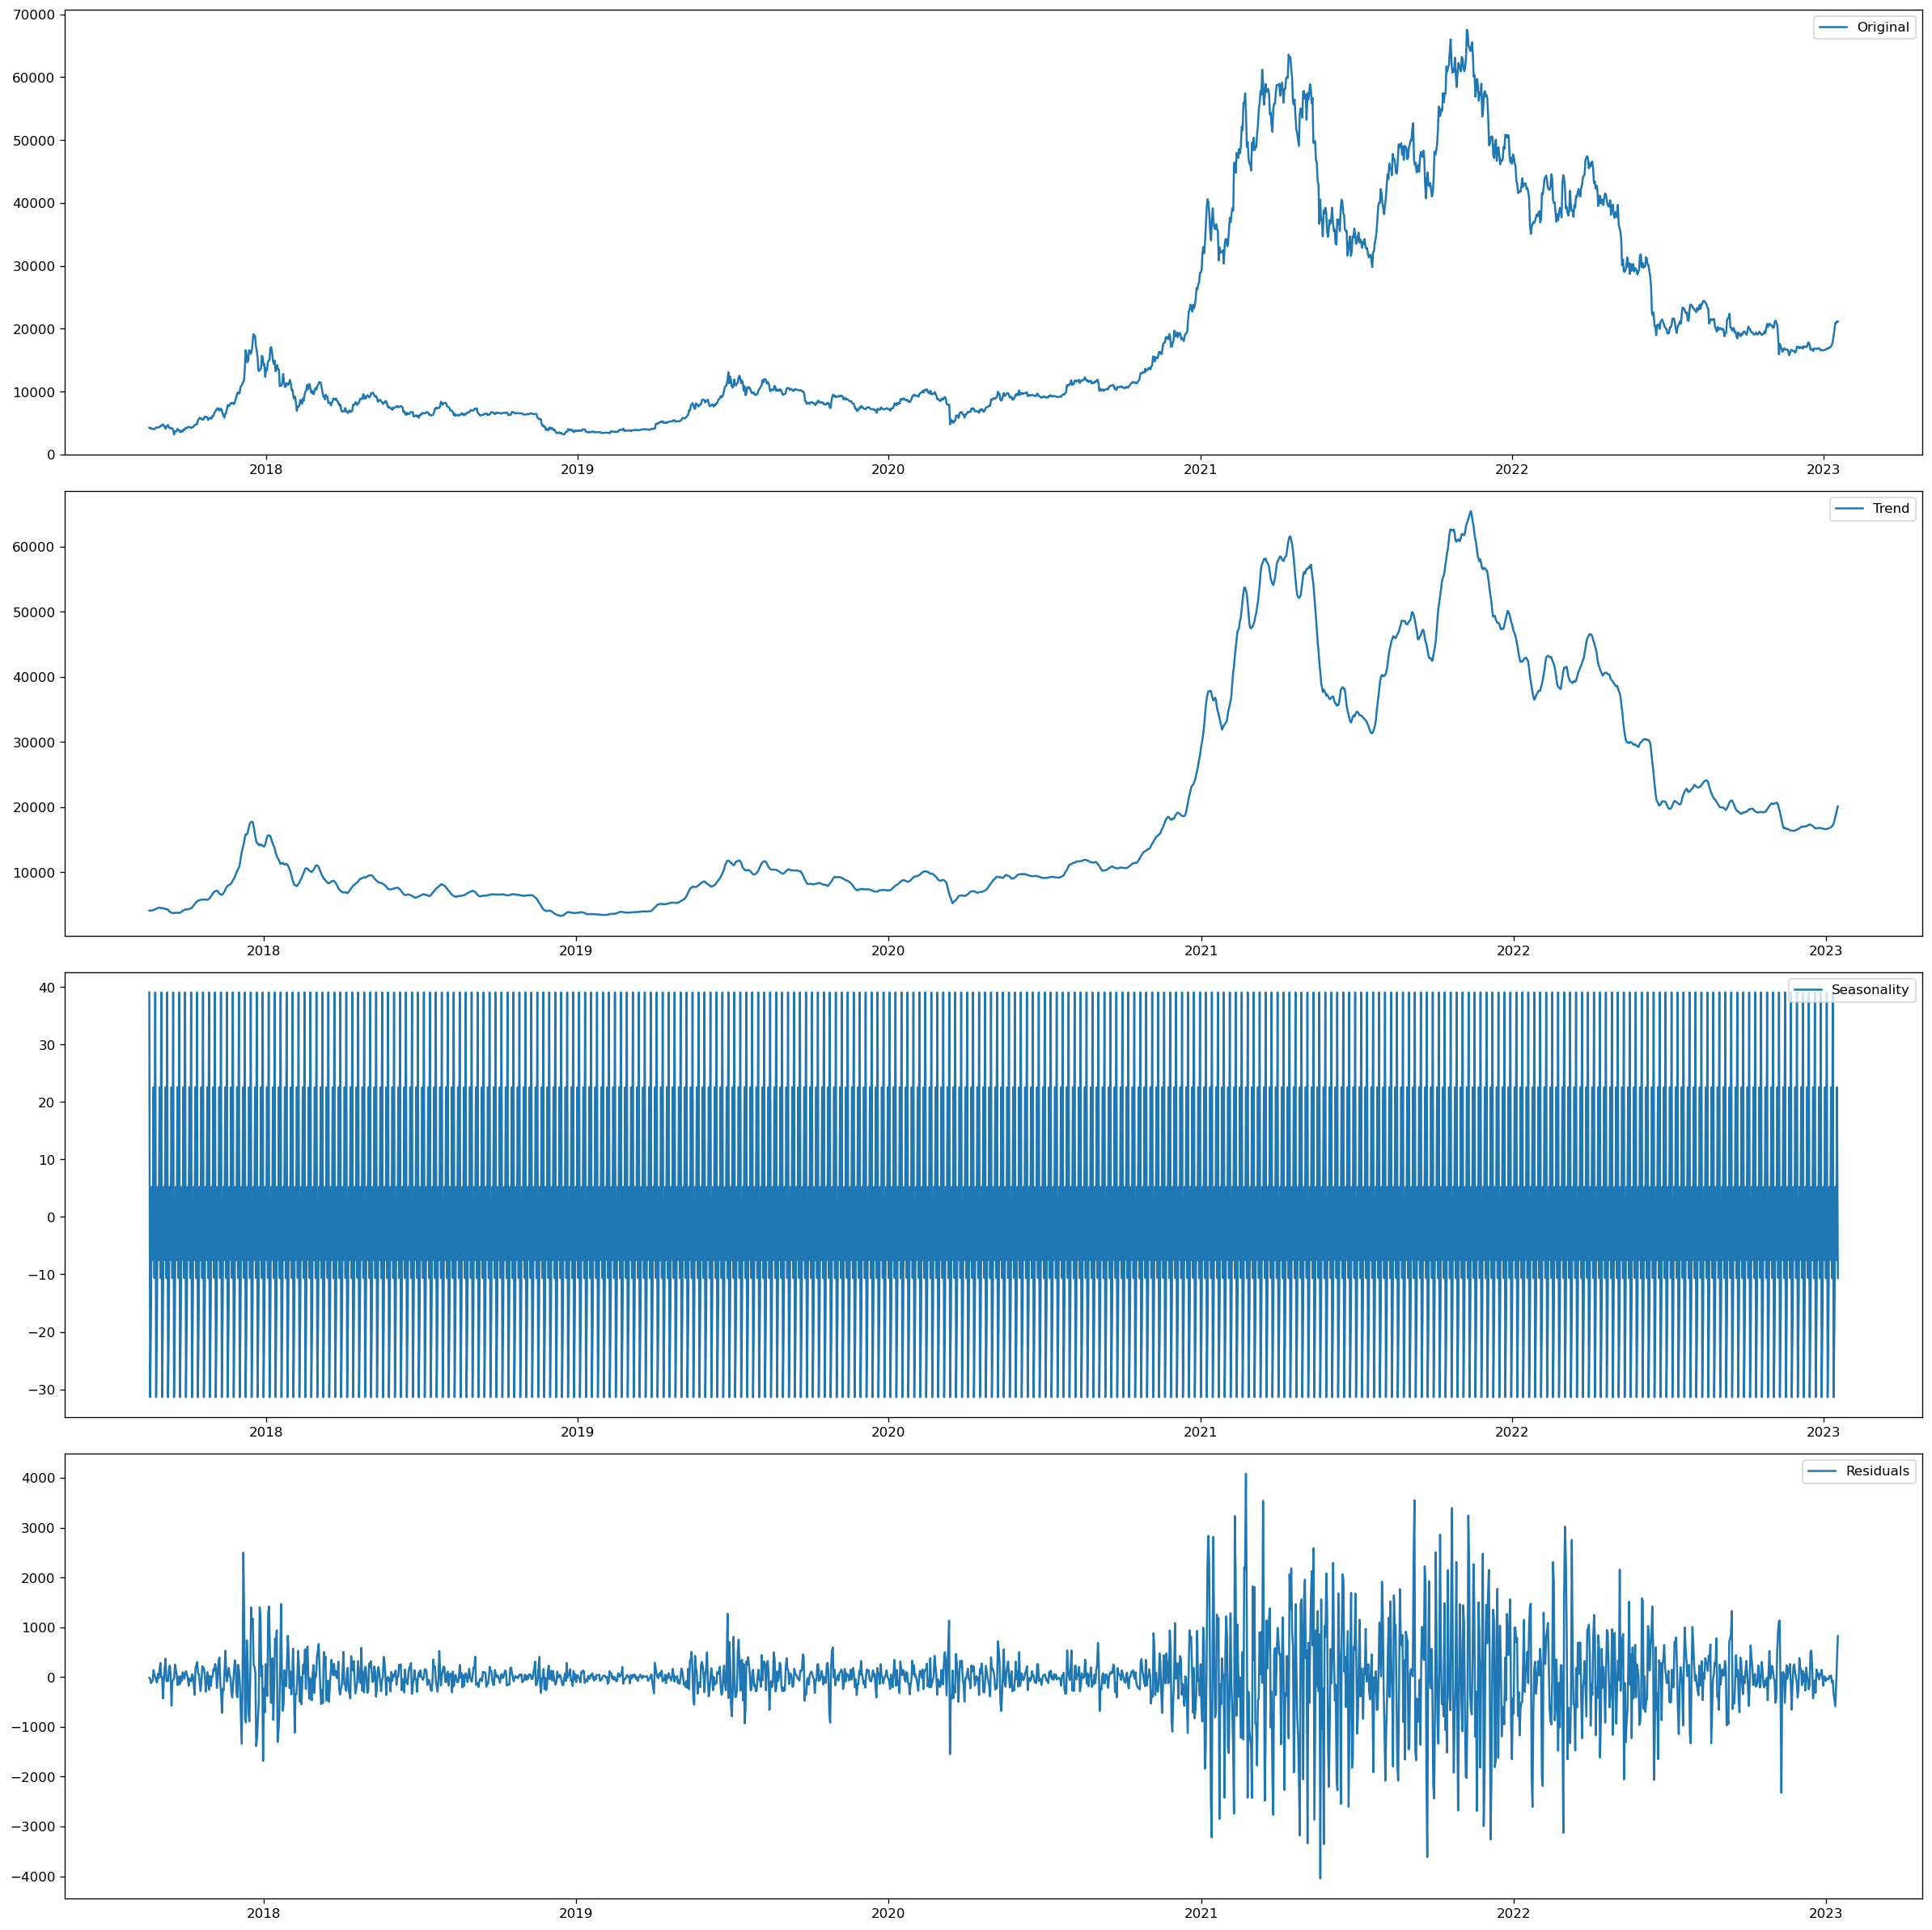

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

dfSimple = dff[["price"]]
decomposition = seasonal_decompose(dfSimple)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(dfSimple, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

### Split train + test

In [80]:
# Borramos la columna time, porque ya la tenemos como indexador.
# Y borramos las columnas de varianza y relativa.
dff = dff.drop(["time", "varianza", "varianzaRelati"], axis=1)
dff

,price
time,
2017-08-17,4261.48
2017-08-18,4285.08
2017-08-19,4108.37
2017-08-20,4120.98
2017-08-21,4069.13
...,...
2023-01-14,19930.01
2023-01-15,20952.76
2023-01-16,20872.99


In [81]:
# Vamos a hacer un split entre train y test, teniendo en cuenta que, al tratarse de una 
# serie de tiempo, tenemos que poner shuffle=False

df_train, df_test = train_test_split(df2, test_size=0.1, random_state=42, shuffle=False)

In [82]:
df_train.tail()

,time,price
566,2020-03-05,8750.99
567,2020-03-06,9054.64
568,2020-03-07,9130.89
569,2020-03-08,8885.25
570,2020-03-09,8034.76


In [83]:
df_test.head()

,time,price
571,2020-03-10,7929.87
572,2020-03-11,7894.57
573,2020-03-12,7934.58
574,2020-03-13,4800.01
575,2020-03-14,5576.05


In [84]:
df_train.shape

(571, 2)

In [85]:
df_test.shape

(64, 2)

In [86]:
# Empezaremos a usar unos modelos, para ver cual se comporta mejor.
# Modelo de la MEDIA CONSTANTE

# Calculamos el promedio, uniforme para todos
model_mean_pred = df_train['price'].mean()

# La predicción es fija y es la misma para el set de testeo y de entrenamiento:
df_train["Mean"] = model_mean_pred
df_test["Mean"] = model_mean_pred

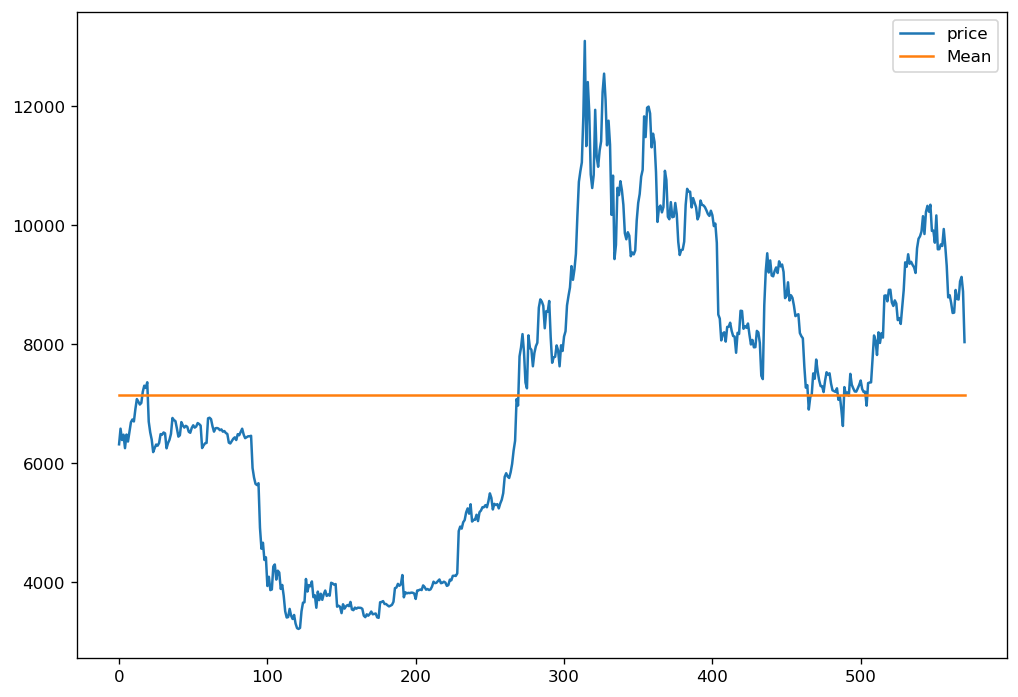

In [87]:
# Ploteamos los valores del set de entrenamiento y el modelo:
df_train.plot(kind="line", y = ["price", "Mean"]);

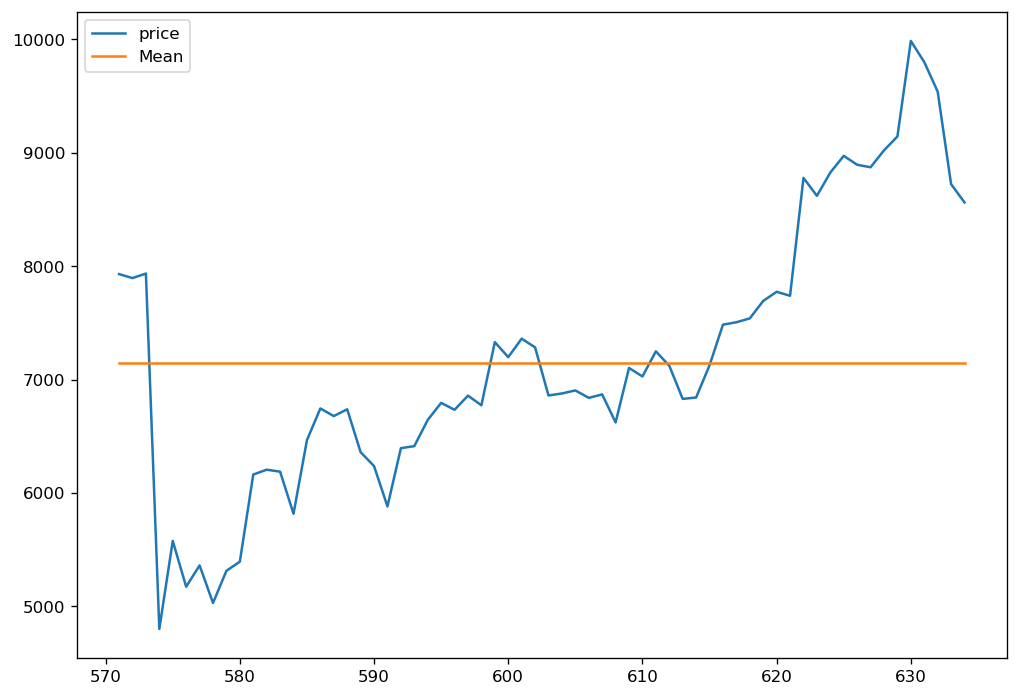

In [88]:
# Ploteamos los valores del set de testeo y el modelo
df_test.plot(kind="line", y = ["price", "Mean"]);

In [89]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

In [90]:
model_mean_RMSE = RMSE(df_test.Mean, df_test.price)
model_mean_RMSE

1189.2780216338815

In [91]:
# Guardamos todo en un dataframe
df_Results = pd.DataFrame(columns = ["Model", "RMSE"])
df_Results.loc[0, "Model"] = "Mean"
df_Results.loc[0, "RMSE"] = model_mean_RMSE
df_Results.head()

,Model,RMSE
0,Mean,1189.278022


In [92]:
# Modelo de la Random Walk
# Generamos el desplazamiento de nuestro nuestro target en el set de entrenamiento (lag=1)
df_train["valueShift1"] = df_train.price.shift()
df_train.head()

,time,price,Mean,valueShift1
0,2018-08-17,6316.00,7148.45993,NaN
1,2018-08-18,6579.04,7148.45993,6316.00
2,2018-08-19,6387.96,7148.45993,6579.04
3,2018-08-20,6477.53,7148.45993,6387.96
4,2018-08-21,6251.00,7148.45993,6477.53


In [93]:
# Generamos el desplazamiento de nuestro nuestro target en el set de testeo (lag=1)
df_test["valueShift1"] = df_test.price.shift()
df_test.head()

,time,price,Mean,valueShift1
571,2020-03-10,7929.87,7148.45993,NaN
572,2020-03-11,7894.57,7148.45993,7929.87
573,2020-03-12,7934.58,7148.45993,7894.57
574,2020-03-13,4800.01,7148.45993,7934.58
575,2020-03-14,5576.05,7148.45993,4800.01


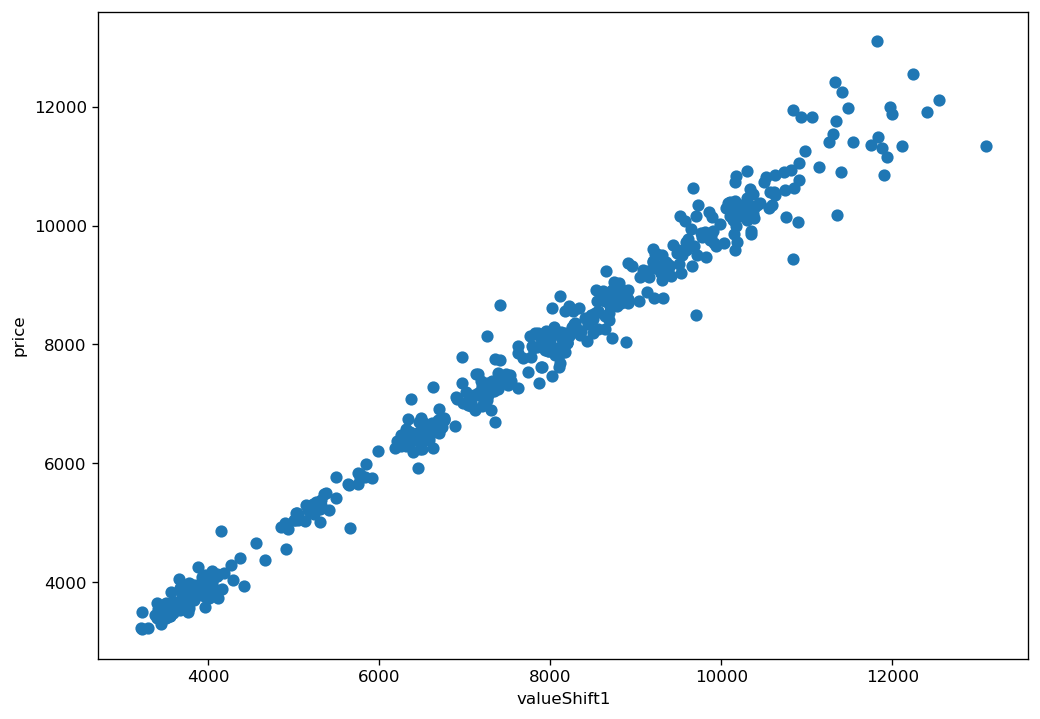

In [98]:
df_train.plot(kind= "scatter", y = "price", x = "valueShift1", s = 40);

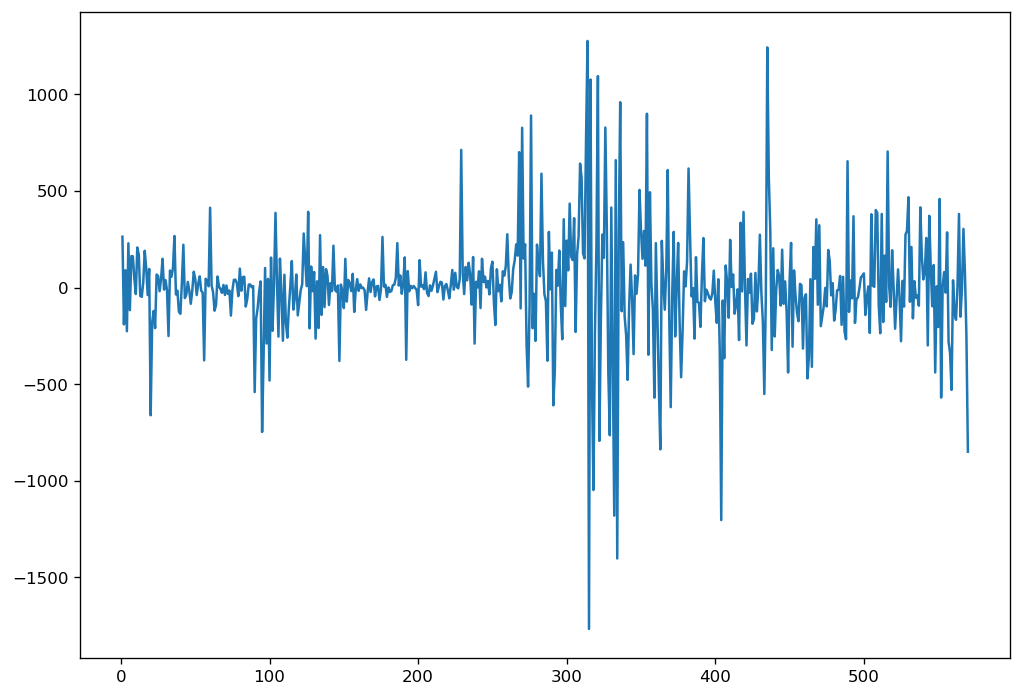

In [99]:
# Ploteamos la diferencia entre nuestro target y el lag de un período
df_train["valueDiff"] = df_train.price - df_train.valueShift1
df_train.valueDiff.plot();

          time    price        Mean  valueShift1  valueDiff  RandomWalk
0   2018-08-17  6316.00  7148.45993          NaN        NaN         NaN
1   2018-08-18  6579.04  7148.45993      6316.00     263.04     6316.00
2   2018-08-19  6387.96  7148.45993      6579.04    -191.08     6579.04
3   2018-08-20  6477.53  7148.45993      6387.96      89.57     6387.96
4   2018-08-21  6251.00  7148.45993      6477.53    -226.53     6477.53
..         ...      ...         ...          ...        ...         ...
566 2020-03-05  8750.99  7148.45993      8760.07      -9.08     8760.07
567 2020-03-06  9054.64  7148.45993      8750.99     303.65     8750.99
568 2020-03-07  9130.89  7148.45993      9054.64      76.25     9054.64
569 2020-03-08  8885.25  7148.45993      9130.89    -245.64     9130.89
570 2020-03-09  8034.76  7148.45993      8885.25    -850.49     8885.25

[571 rows x 6 columns]


<AxesSubplot:>

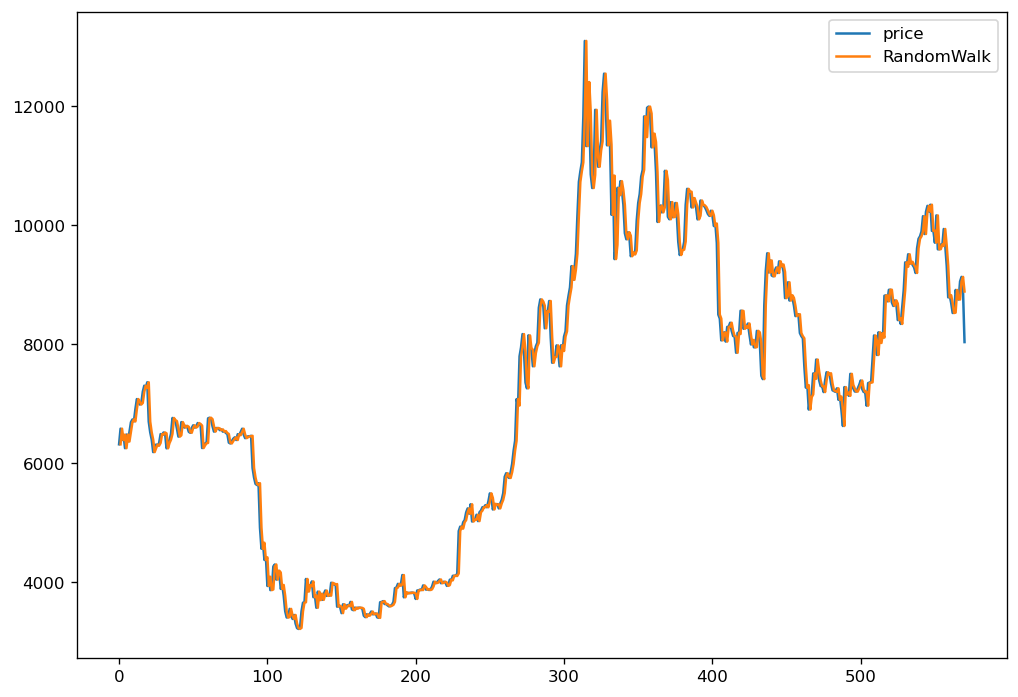

In [100]:
df_train["RandomWalk"] = df_train.valueShift1
print(df_train)

df_train.plot(kind="line", y = ["price", "RandomWalk"])

In [106]:
# La predicción sobre el set de testeo es simplemente la última observación
# registrada en el set de entrenamiento.
# A partir de ahí, como la esperanza del shock es 0, y_t = y_t-1

df_test["RandomWalk"] = pd.Series(df_train["price"][1], index=df_test.index)
print(df_test["RandomWalk"])

571    6579.04
572    6579.04
573    6579.04
574    6579.04
575    6579.04
        ...   
630    6579.04
631    6579.04
632    6579.04
633    6579.04
634    6579.04
Name: RandomWalk, Length: 64, dtype: float64


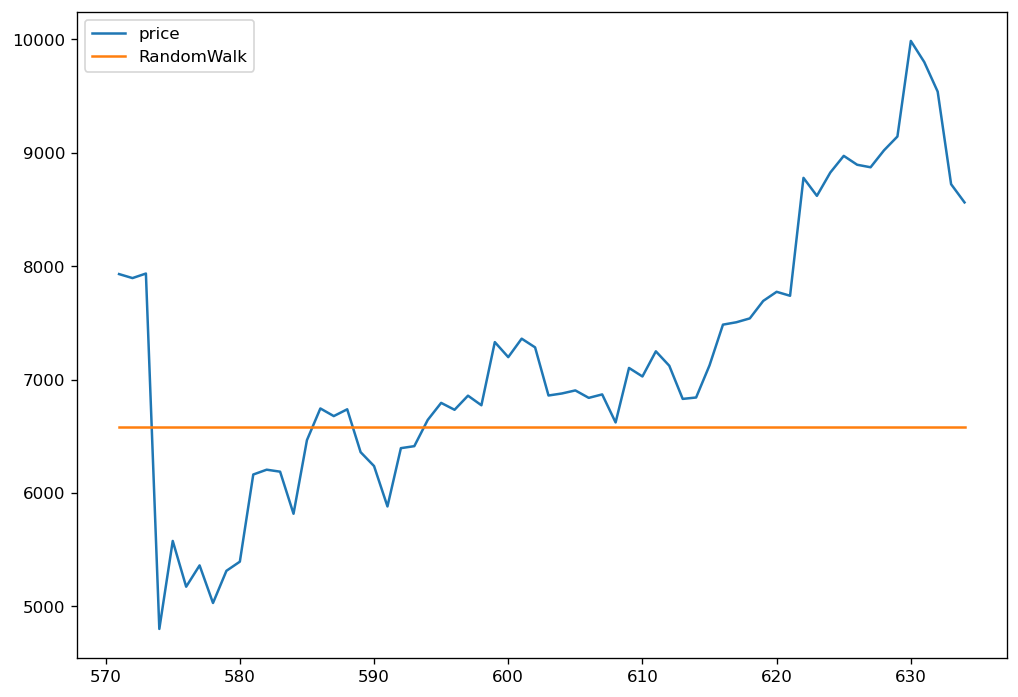

In [103]:
df_test.plot(kind="line", y = ["price", "RandomWalk"]);

In [104]:
# Calculamos el RMSE y almacenamos los resultados
df_Results.loc[1, "Model"] = "RandomWalk"
df_Results.loc[1, "RMSE"] = RMSE(df_test.RandomWalk, df_test.price)
df_Results

,Model,RMSE
0,Mean,1189.278022
1,RandomWalk,1331.209763


In [126]:
# Tendencia lineal
# Identificamos el punto de inicio de la data
df_train.index.min()

Timestamp('2017-08-17 00:00:00')

In [127]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
df_train["timeIndex"] = df_train.index - df_train.index.min()
df_test["timeIndex"] = df_test.index - df_train.index.min()

In [128]:
# Transformamos la última columna de días a meses con timedelta
df_train["timeIndex"] =  df_train["timeIndex"] / np.timedelta64(1, 'D')
df_test["timeIndex"] =  df_test["timeIndex"] / np.timedelta64(1, 'D')

In [129]:
# Redondeamos, quitando todos los decimales
df_train["timeIndex"] = df_train["timeIndex"].round(0).astype(int)
df_test["timeIndex"] = df_test["timeIndex"].round(0).astype(int)

In [130]:
df_train.tail()

,price,Mean,valueShift1,valueDiff,RandomWalk,timeIndex
time,,,,,,
2022-06-29,20281.28,19396.700718,20742.57,-461.29,20742.57,1777
2022-06-30,20123.00,19396.700718,20281.28,-158.28,20281.28,1778
2022-07-01,19942.21,19396.700718,20123.00,-180.79,20123.00,1779
2022-07-02,19279.80,19396.700718,19942.21,-662.41,19942.21,1780
2022-07-03,19252.82,19396.700718,19279.80,-26.98,19279.80,1781


In [131]:
df_test.head()

,price,Mean,valueShift1,RandomWalk,timeIndex
time,,,,,
2022-07-04,19315.83,19396.700718,NaN,19252.82,1782
2022-07-05,20236.71,19396.700718,19315.83,19252.82,1783
2022-07-06,20175.84,19396.700718,20236.71,19252.82,1784
2022-07-07,20564.51,19396.700718,20175.84,19252.82,1785
2022-07-08,21624.99,19396.700718,20564.51,19252.82,1786


In [132]:
# Ahora fiteamos nuestro modelo de regresión lineal entre Value y timeIndex
model_linear = smf.ols('price ~ timeIndex', data = df_train).fit()

In [133]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     2529.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:56:33   Log-Likelihood:                -19155.
No. Observations:                1782   AIC:                         3.831e+04
Df Residuals:                    1780   BIC:                         3.833e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3870.0705    534.289     -7.243      0.000   -4917.970   -2822.171
timeIndex     26.1278      0.520     50.291      0.000      25.109      27.147
==============================================================================
Omnibus:                       93.500   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.718
Skew:                           0.592   Prob(JB):                     6.71e-24
Kurtosis:                       2.814   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
# Veamos las predicciones del modelo sobre el set de entrenamiento:

model_linear_pred_train = model_linear.predict(df_train.timeIndex)
model_linear_pred_train[-5:]

time
2022-06-29    42558.960879
2022-06-30    42585.088640
2022-07-01    42611.216401
2022-07-02    42637.344162
2022-07-03    42663.471923
dtype: float64

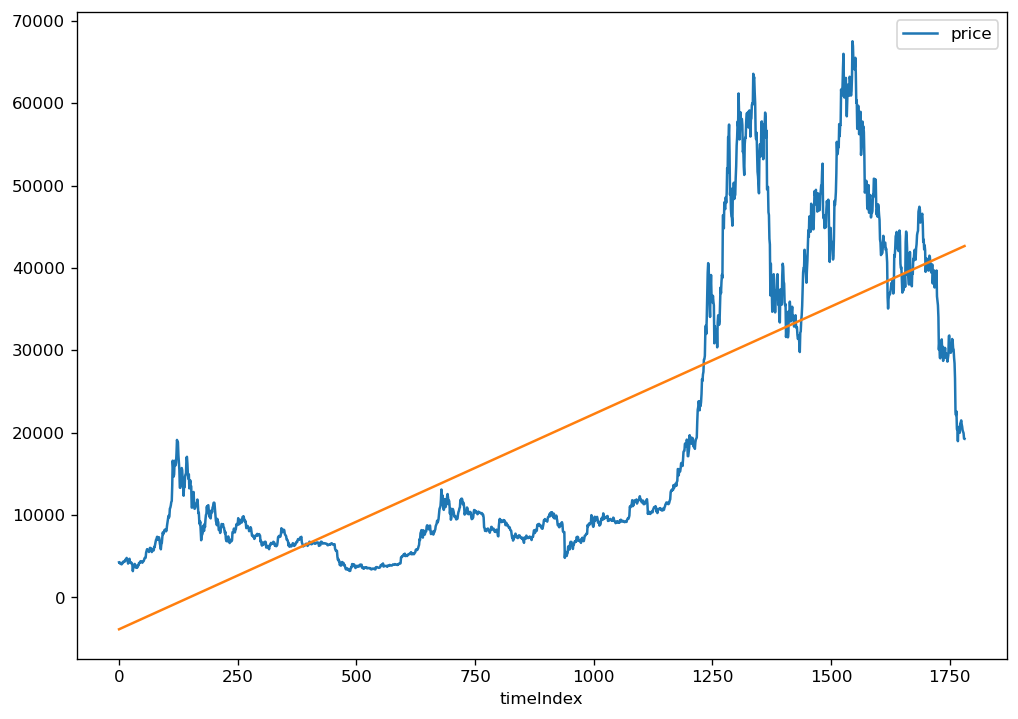

In [135]:
# Ploteamos los resultados de la predicción
df_train.plot(kind = "line", x = "timeIndex", y = "price")
plt.plot(df_train.timeIndex, model_linear_pred_train, '-');

In [136]:
# Veamos las predicciones del modelo sobre el set de testeo:

model_linear_pred_test = model_linear.predict(df_test.timeIndex)
model_linear_pred_test[-5:]

time
2023-01-14    47758.385326
2023-01-15    47784.513087
2023-01-16    47810.640848
2023-01-17    47836.768609
2023-01-18    47862.896370
dtype: float64

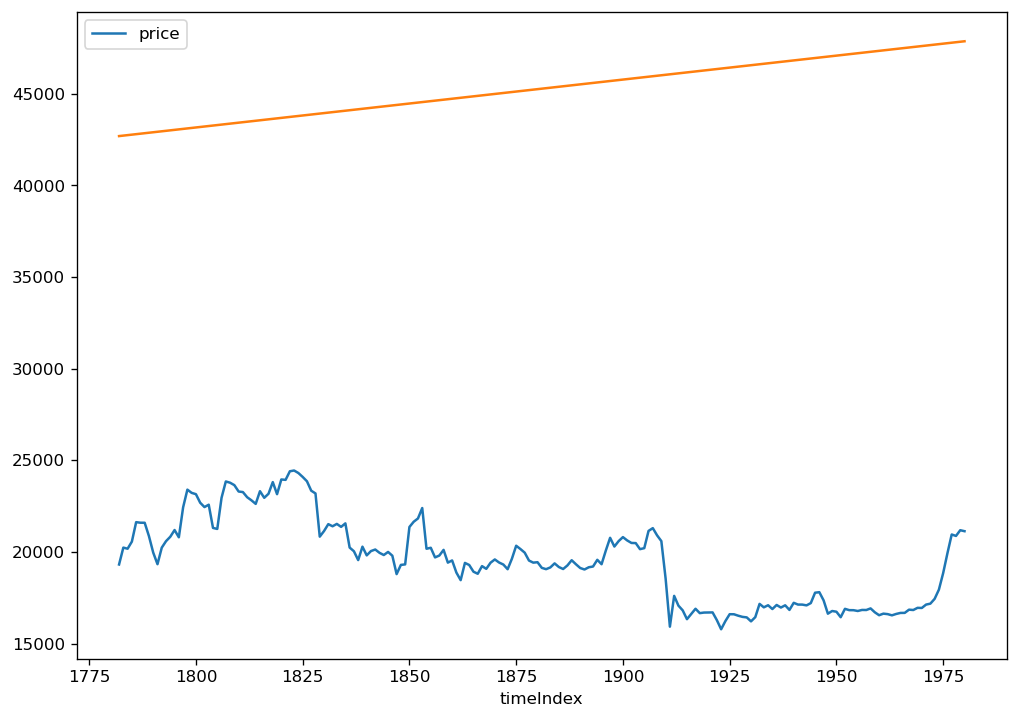

In [137]:
# Ploteamos los resultados de la predicción

df_test.plot(kind = "line", x = "timeIndex", y = "price")
plt.plot(df_test.timeIndex, model_linear_pred_test, '-');

In [138]:
# Agregamos las predicciones a df_test:

df_test["LinearTrend"] = model_linear_pred_test
df_test.head()

,price,Mean,valueShift1,RandomWalk,timeIndex,LinearTrend
time,,,,,,
2022-07-04,19315.83,19396.700718,NaN,19252.82,1782,42689.599684
2022-07-05,20236.71,19396.700718,19315.83,19252.82,1783,42715.727445
2022-07-06,20175.84,19396.700718,20236.71,19252.82,1784,42741.855206
2022-07-07,20564.51,19396.700718,20175.84,19252.82,1785,42767.982967
2022-07-08,21624.99,19396.700718,20564.51,19252.82,1786,42794.110728


In [139]:
# Calculamos el error:

model_linear_RMSE = RMSE(df_test.LinearTrend, df_test.price)
model_linear_RMSE

25984.98244605767

In [140]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior

df_Results.loc[2, "Model"] = "LinearTrend"
df_Results.loc[2, "RMSE"] = model_linear_RMSE
df_Results

,Model,RMSE
0,Mean,2293.293648
1,RandomWalk,2306.653727
2,LinearTrend,25984.982446


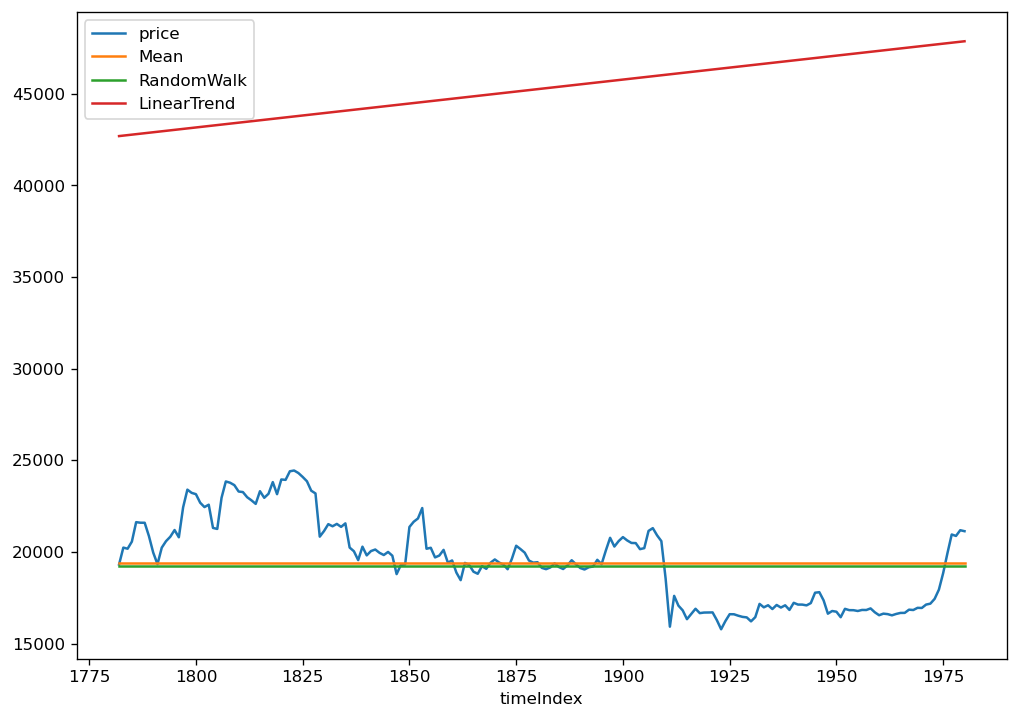

In [141]:
# Ploteamos las estimaciones
df_test.plot(kind = "line", x = "timeIndex", y = ["price", "Mean", "RandomWalk",
                                                 "LinearTrend"]);

In [142]:
# Tendencia cuadrática
# Creamos las dummies de tiempo cuadráticas:

df_train["timeIndex_sq"] = df_train["timeIndex"]**2
df_test["timeIndex_sq"] = df_test["timeIndex"]**2

In [143]:
# Ahora fiteamos nuestro modelo de regresión lineal entre value y timeIndex + timeIndex_sq

model_quadratic = smf.ols('price ~ timeIndex + timeIndex_sq', data = df_train).fit()

In [144]:
model_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1828.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:59:46   Log-Likelihood:                -18948.
No. Observations:                1782   AIC:                         3.790e+04
Df Residuals:                    1779   BIC:                         3.792e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7597.3088    713.129     10.653      0.000    6198.650    8995.968
timeIndex      -12.5263      1.849     -6.773      0.000     -16.154      -8.899
timeIndex_sq     0.0217      0.001     21.586      0.000       0.020       0.024
==============================================================================
Omnibus:                      188.239   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.270
Skew:                           0.592   Prob(JB):                    5.14e-105
Kurtosis:                       5.251   Cond. No.                     4.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
# Veamos las predicciones del modelo sobre el set de entrenamiento:

model_quadratic_pred_train = model_quadratic.predict(df_train[["timeIndex",\
                                                      "timeIndex_sq"]])
model_quadratic_pred_train[-5:]

time
2022-06-29    53872.071117
2022-06-30    53936.701041
2022-07-01    54001.374371
2022-07-02    54066.091109
2022-07-03    54130.851254
dtype: float64

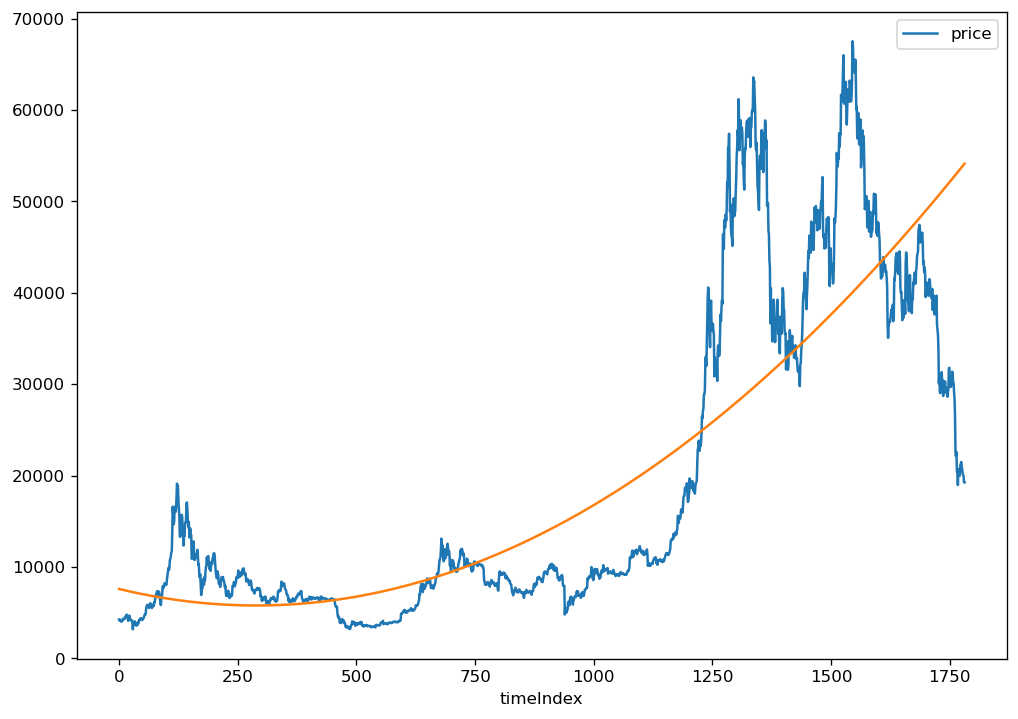

In [146]:
# Ploteamos los resultados de la predicción:

df_train.plot(kind = "line", x = "timeIndex", y = "price")
plt.plot(df_train.timeIndex, model_quadratic_pred_train, '-');

In [147]:
# Veamos las predicciones del modelo sobre el set de testeo:

model_quadratic_pred_test = model_quadratic.predict(df_test[["timeIndex",\
                                                      "timeIndex_sq"]])
model_quadratic_pred_test[-5:]

time
2023-01-14    67588.590624
2023-01-15    67661.858575
2023-01-16    67735.169933
2023-01-17    67808.524698
2023-01-18    67881.922871
dtype: float64

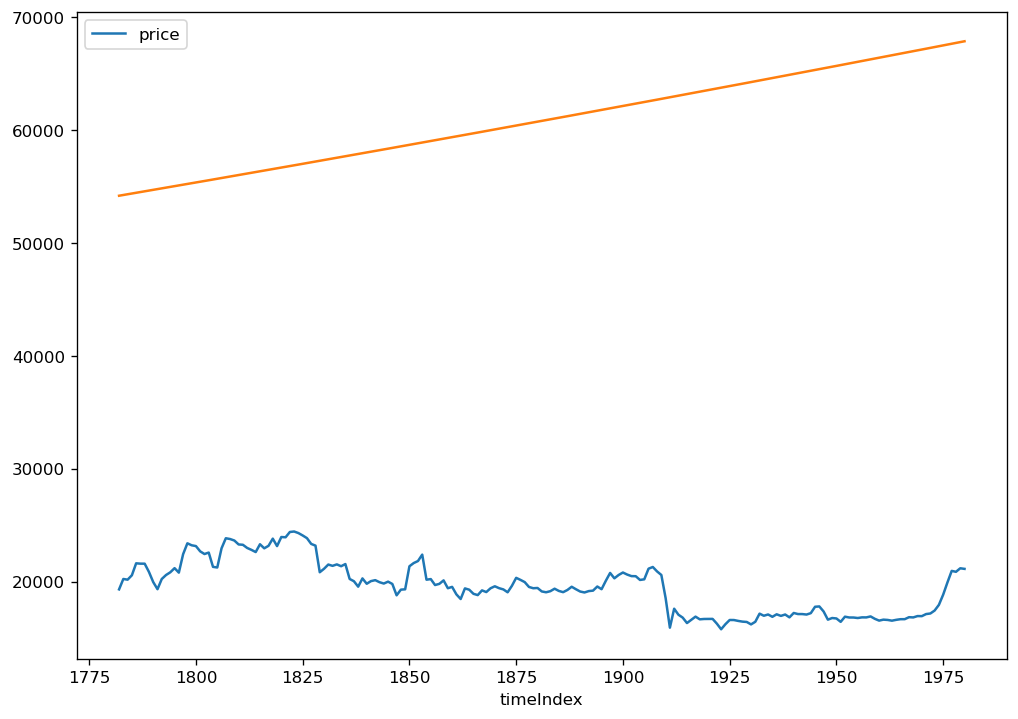

In [148]:
# Ploteamos los resultados de la predicción

df_test.plot(kind = "line", x = "timeIndex", y = "price")
plt.plot(df_test.timeIndex, model_quadratic_pred_test, '-');

In [149]:
df_test["QuadraticTrend"] = model_quadratic_pred_test
df_test.head()

,price,Mean,valueShift1,RandomWalk,timeIndex,LinearTrend,timeIndex_sq,QuadraticTrend
time,,,,,,,,
2022-07-04,19315.83,19396.700718,NaN,19252.82,1782,42689.599684,3175524,54195.654807
2022-07-05,20236.71,19396.700718,19315.83,19252.82,1783,42715.727445,3179089,54260.501766
2022-07-06,20175.84,19396.700718,20236.71,19252.82,1784,42741.855206,3182656,54325.392133
2022-07-07,20564.51,19396.700718,20175.84,19252.82,1785,42767.982967,3186225,54390.325907
2022-07-08,21624.99,19396.700718,20564.51,19252.82,1786,42794.110728,3189796,54455.303087


In [150]:
# Calculamos el error:

model_quadratic_RMSE = RMSE(df_test.QuadraticTrend, df_test.price)
model_quadratic_RMSE

41780.07403820821

In [151]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior
df_Results.loc[3, "Model"] = "QuadraticTrend"
df_Results.loc[3, "RMSE"] = model_quadratic_RMSE
df_Results

,Model,RMSE
0,Mean,2293.293648
1,RandomWalk,2306.653727
2,LinearTrend,25984.982446
3,QuadraticTrend,41780.074038


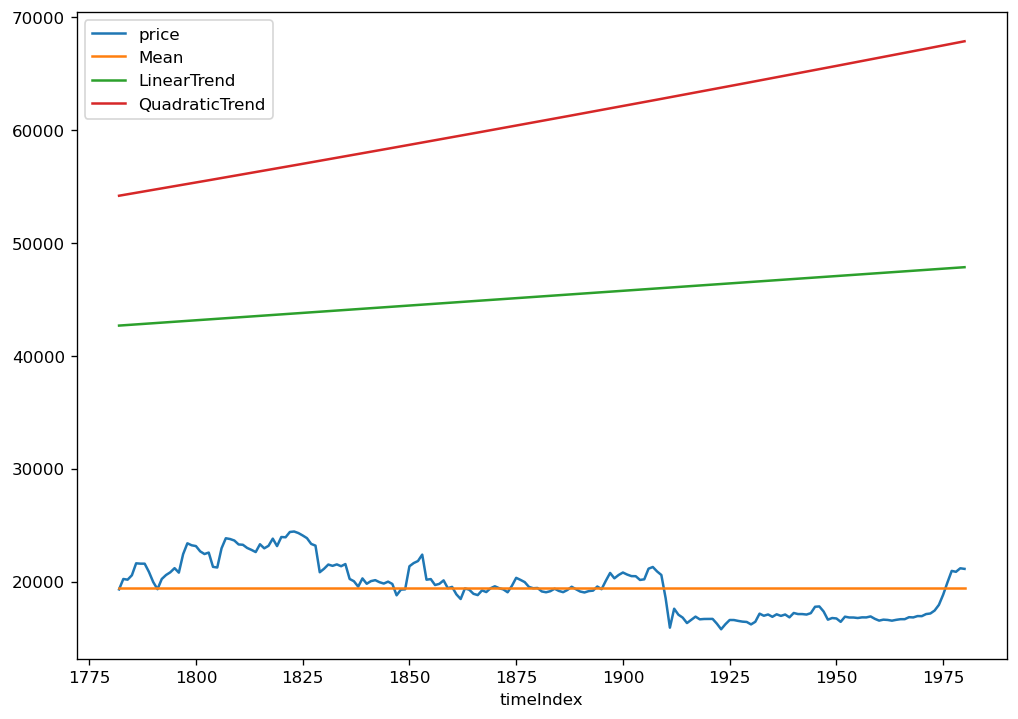

In [152]:
# Ploteamos todas las estimaciones
df_test.plot(kind = "line", x = "timeIndex", y = ["price", "Mean",
                                                 "LinearTrend", "QuadraticTrend"]);

## Tendencia cuadrática + dummies mensuales en escala logaritmica

In [153]:
# Tendencia cuadrática + dummies mensuales
# Extraemos los meses y los creamos en una columna nueva en el df
dff['Month'] = dff['time'].dt.month

In [154]:
# Creamos una nueva columna con la escala logaritmica
dff["log10Y"] = dff["price"].apply(lambda x: math.log10(x))
dff

,time,price,varianza,varianzaRelati,Month,log10Y
time,,,,,,
2017-08-17,2017-08-17,4261.48,NaN,NaN,8,3.629560
2017-08-18,2017-08-18,4285.08,23.60,0.005507,8,3.631959
2017-08-19,2017-08-19,4108.37,-176.71,-0.043012,8,3.613670
2017-08-20,2017-08-20,4120.98,12.61,0.003060,8,3.615001
2017-08-21,2017-08-21,4069.13,-51.85,-0.012742,8,3.609502
...,...,...,...,...,...,...
2023-01-14,2023-01-14,19930.01,1083.39,0.054360,1,4.299508
2023-01-15,2023-01-15,20952.76,1022.75,0.048812,1,4.321241
2023-01-16,2023-01-16,20872.99,-79.77,-0.003822,1,4.319585


In [155]:
dff

,time,price,varianza,varianzaRelati,Month,log10Y
time,,,,,,
2017-08-17,2017-08-17,4261.48,NaN,NaN,8,3.629560
2017-08-18,2017-08-18,4285.08,23.60,0.005507,8,3.631959
2017-08-19,2017-08-19,4108.37,-176.71,-0.043012,8,3.613670
2017-08-20,2017-08-20,4120.98,12.61,0.003060,8,3.615001
2017-08-21,2017-08-21,4069.13,-51.85,-0.012742,8,3.609502
...,...,...,...,...,...,...
2023-01-14,2023-01-14,19930.01,1083.39,0.054360,1,4.299508
2023-01-15,2023-01-15,20952.76,1022.75,0.048812,1,4.321241
2023-01-16,2023-01-16,20872.99,-79.77,-0.003822,1,4.319585


In [156]:
# Creamos variables dummie para los meses:
dummie_mes = pd.get_dummies(dff, columns=['Month'], prefix='mes')
dummie_mes.head()

,time,price,varianza,varianzaRelati,log10Y,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
time,,,,,,,,,,,,,,,,,
2017-08-17,2017-08-17,4261.48,NaN,NaN,3.629560,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-18,2017-08-18,4285.08,23.60,0.005507,3.631959,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-19,2017-08-19,4108.37,-176.71,-0.043012,3.613670,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-20,2017-08-20,4120.98,12.61,0.003060,3.615001,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-21,2017-08-21,4069.13,-51.85,-0.012742,3.609502,0,0,0,0,0,0,0,1,0,0,0,0


In [157]:
dummie_mes

,time,price,varianza,varianzaRelati,log10Y,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
time,,,,,,,,,,,,,,,,,
2017-08-17,2017-08-17,4261.48,NaN,NaN,3.629560,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-18,2017-08-18,4285.08,23.60,0.005507,3.631959,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-19,2017-08-19,4108.37,-176.71,-0.043012,3.613670,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-20,2017-08-20,4120.98,12.61,0.003060,3.615001,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-21,2017-08-21,4069.13,-51.85,-0.012742,3.609502,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-14,2023-01-14,19930.01,1083.39,0.054360,4.299508,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-15,2023-01-15,20952.76,1022.75,0.048812,4.321241,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-16,2023-01-16,20872.99,-79.77,-0.003822,4.319585,1,0,0,0,0,0,0,0,0,0,0,0


In [158]:
dummie_mes.index = pd.DatetimeIndex(dummie_mes["time"])
dummie_mes


,time,price,varianza,varianzaRelati,log10Y,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
time,,,,,,,,,,,,,,,,,
2017-08-17,2017-08-17,4261.48,NaN,NaN,3.629560,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-18,2017-08-18,4285.08,23.60,0.005507,3.631959,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-19,2017-08-19,4108.37,-176.71,-0.043012,3.613670,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-20,2017-08-20,4120.98,12.61,0.003060,3.615001,0,0,0,0,0,0,0,1,0,0,0,0
2017-08-21,2017-08-21,4069.13,-51.85,-0.012742,3.609502,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-14,2023-01-14,19930.01,1083.39,0.054360,4.299508,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-15,2023-01-15,20952.76,1022.75,0.048812,4.321241,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-16,2023-01-16,20872.99,-79.77,-0.003822,4.319585,1,0,0,0,0,0,0,0,0,0,0,0


In [159]:
dfD_train, dfD_test = train_test_split(dummie_mes, test_size=0.1, random_state=42, shuffle=False)

In [160]:
# Identificamos el punto de inicio de la data
dfD_train.index.min()

Timestamp('2017-08-17 00:00:00')

In [161]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
dfD_train["timeIndex"] = dfD_train.index - dfD_train.index.min()
dfD_test["timeIndex"] = dfD_test.index - dfD_train.index.min()

In [162]:
# Transformamos la última columna de días a meses con timedelta
dfD_train["timeIndex"] =  dfD_train["timeIndex"] / np.timedelta64(1, 'D')
dfD_test["timeIndex"] =  dfD_test["timeIndex"] / np.timedelta64(1, 'D')

In [163]:
# Redondeamos, quitando todos los decimales
dfD_train["timeIndex"] = dfD_train["timeIndex"].round(0).astype(int)
dfD_test["timeIndex"] = dfD_test["timeIndex"].round(0).astype(int)

In [164]:
dfD_train.tail()

,time,price,varianza,varianzaRelati,log10Y,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12,timeIndex
time,,,,,,,,,,,,,,,,,,
2022-06-29,2022-06-29,20281.28,-461.29,-0.022745,4.307095,0,0,0,0,0,1,0,0,0,0,0,0,1777
2022-06-30,2022-06-30,20123.00,-158.28,-0.007866,4.303693,0,0,0,0,0,1,0,0,0,0,0,0,1778
2022-07-01,2022-07-01,19942.21,-180.79,-0.009066,4.299773,0,0,0,0,0,0,1,0,0,0,0,0,1779
2022-07-02,2022-07-02,19279.80,-662.41,-0.034358,4.285103,0,0,0,0,0,0,1,0,0,0,0,0,1780
2022-07-03,2022-07-03,19252.82,-26.98,-0.001401,4.284494,0,0,0,0,0,0,1,0,0,0,0,0,1781


In [165]:
# Creamos las dummies de tiempo cuadráticas:

dfD_train["timeIndex_sq"] = dfD_train["timeIndex"]**2
dfD_test["timeIndex_sq"] = dfD_test["timeIndex"]**2

In [166]:
# Ahora fiteamos nuestro modelo de regresión lineal entre value y timeIndex + timeIndex_sq
# más las dummies de mes

model_trend_est = smf.ols('log10Y ~ timeIndex + timeIndex_sq + mes_1 + mes_2 + mes_3 + mes_4 + mes_5 + mes_7 + mes_8 + mes_9 + mes_10 + mes_11 + mes_12',\
                          data = dfD_train).fit()

In [167]:
model_trend_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log10Y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:00:02   Log-Likelihood:                 407.13
No. Observations:                1782   AIC:                            -786.3
Df Residuals:                    1768   BIC:                            -709.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7515      0.021    180.384      0.000       3.711       3.792
timeIndex       -0.0002   3.58e-05     -5.356      0.000      -0.000      -0.000
timeIndex_sq  4.417e-07   1.95e-08     22.691      0.000    4.04e-07     4.8e-07
mes_1            0.1042      0.022      4.697      0.000       0.061       0.148
mes_2            0.0941      0.023      4.144      0.000       0.050       0.139
mes_3            0.0669      0.022      3.021      0.003       0.023       0.110
mes_4            0.0660      0.022      2.955      0.003       0.022       0.110
mes_5            0.0605      0.022      2.732      0.006       0.017       0.104
mes_7            0.0827      0.023      3.529      0.000       0.037       0.129
mes_8            0.0990      0.023      4.330      0.000       0.054       0.144
mes_9            0.0430      0.022      1.915      0.056      -0.001       0.087
mes_10           0.0625      0.022      2.811      0.005       0.019       0.106
mes_11           0.0970      0.022      4.328      0.000       0.053       0.141
mes_12           0.0965      0.022      4.344      0.000       0.053       0.140
==============================================================================
Omnibus:                       10.149   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.226
Skew:                           0.129   Prob(JB):                      0.00992
Kurtosis:                       2.760   Cond. No.                     1.77e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
# Veamos las predicciones del modelo sobre el set de entrenamiento:

model_trend_est_pred_train = model_trend_est.predict(dfD_train[["timeIndex", "timeIndex_sq",\
                                                               "mes_1", "mes_2", "mes_3", "mes_4",\
                                                                "mes_5", "mes_6",\
                                                                "mes_7", "mes_8", "mes_9",\
                                                                "mes_10", "mes_11", "mes_12"]])
model_trend_est_pred_train[-5:]

time
2022-06-29    4.805452
2022-06-30    4.806831
2022-07-01    4.890893
2022-07-02    4.892273
2022-07-03    4.893655
dtype: float64

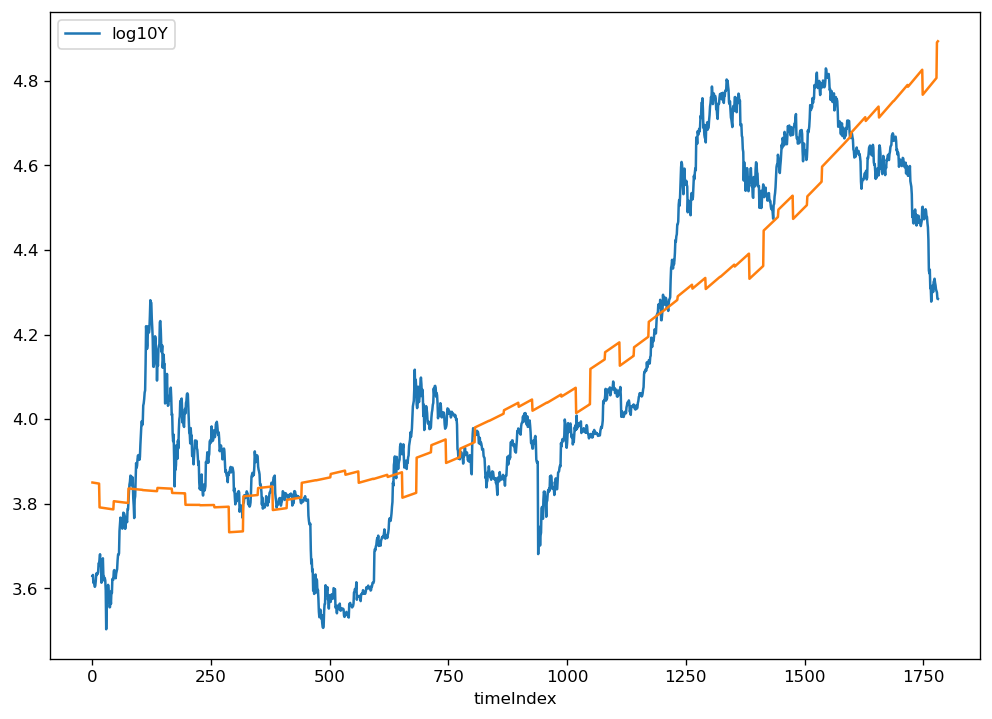

In [169]:
# Ploteamos los resultados de la predicción:

dfD_train.plot(kind = "line", x = "timeIndex", y = "log10Y")
plt.plot(dfD_train.timeIndex, model_trend_est_pred_train, '-')

In [170]:
# Veamos las predicciones del modelo sobre el set de testeo:

model_trend_est_pred_test = model_trend_est.predict(dfD_test[["timeIndex", "timeIndex_sq",\
                                                               "mes_1", "mes_2", "mes_3", "mes_4",\
                                                                "mes_5", "mes_6",\
                                                                "mes_7", "mes_8", "mes_9",\
                                                                "mes_10", "mes_11", "mes_12"]])
model_trend_est_pred_test[-5:]

time
2023-01-14    5.201383
2023-01-15    5.202938
2023-01-16    5.204493
2023-01-17    5.206049
2023-01-18    5.207606
dtype: float64

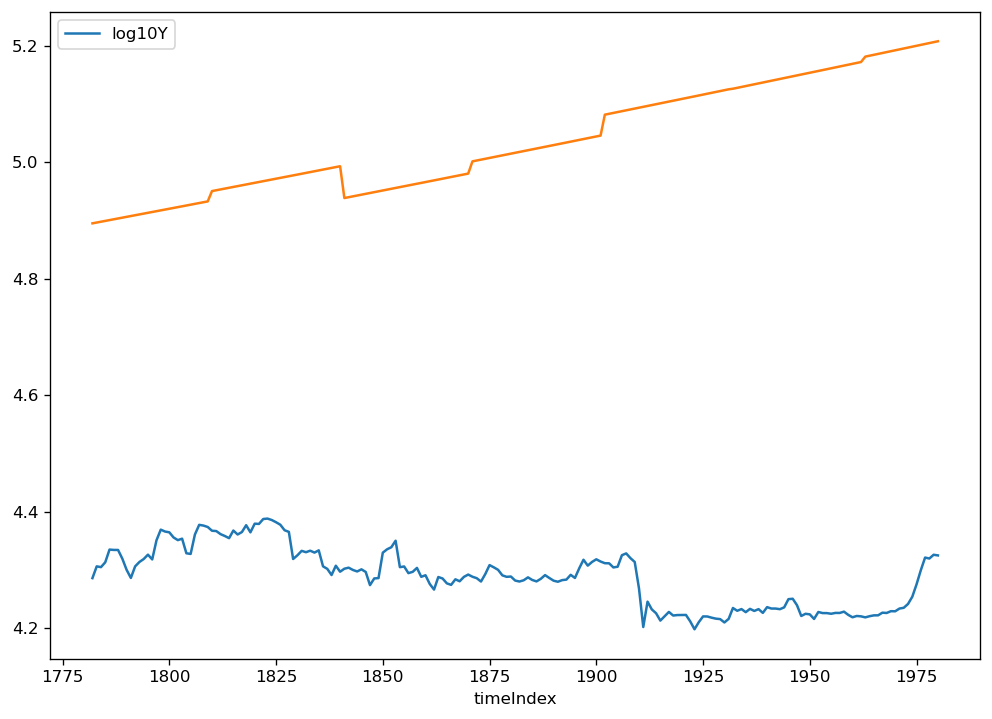

In [171]:
# Ploteamos los resultados de la predicción:

dfD_test.plot(kind = "line", x = "timeIndex", y = "log10Y")
plt.plot(dfD_test.timeIndex, model_trend_est_pred_test, '-');

In [172]:
# Calculamos el error:

dfD_test["Trend_Est"] = model_trend_est_pred_test
dfD_test.head()

,time,price,varianza,varianzaRelati,log10Y,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12,timeIndex,timeIndex_sq,Trend_Est
time,,,,,,,,,,,,,,,,,,,,
2022-07-04,2022-07-04,19315.83,63.01,0.003262,4.285913,0,0,0,0,0,0,1,0,0,0,0,0,1782,3175524,4.895037
2022-07-05,2022-07-05,20236.71,920.88,0.045505,4.306140,0,0,0,0,0,0,1,0,0,0,0,0,1783,3179089,4.896419
2022-07-06,2022-07-06,20175.84,-60.87,-0.003017,4.304832,0,0,0,0,0,0,1,0,0,0,0,0,1784,3182656,4.897803
2022-07-07,2022-07-07,20564.51,388.67,0.018900,4.313118,0,0,0,0,0,0,1,0,0,0,0,0,1785,3186225,4.899188
2022-07-08,2022-07-08,21624.99,1060.48,0.049040,4.334956,0,0,0,0,0,0,1,0,0,0,0,0,1786,3189796,4.900574


In [173]:
model_trend_est_RMSE = RMSE(dfD_test.Trend_Est, dfD_test.price)
model_trend_est_RMSE

19666.94621722887

In [174]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior
df_Results.loc[4, "Model"] = "Trend_Est"
df_Results.loc[4, "RMSE"] = model_trend_est_RMSE
df_Results

,Model,RMSE
0,Mean,2293.293648
1,RandomWalk,2306.653727
2,LinearTrend,25984.982446
3,QuadraticTrend,41780.074038
4,Trend_Est,19666.946217


### Vamos hacer la tendencia cuadratica pero trimestralmente en escala logaritmica

In [175]:
# Creamos la columna trimestre en el dataframe
dff['trimestre'] = dff['time'].dt.quarter
dff

,time,price,varianza,varianzaRelati,Month,log10Y,trimestre
time,,,,,,,
2017-08-17,2017-08-17,4261.48,NaN,NaN,8,3.629560,3
2017-08-18,2017-08-18,4285.08,23.60,0.005507,8,3.631959,3
2017-08-19,2017-08-19,4108.37,-176.71,-0.043012,8,3.613670,3
2017-08-20,2017-08-20,4120.98,12.61,0.003060,8,3.615001,3
2017-08-21,2017-08-21,4069.13,-51.85,-0.012742,8,3.609502,3
...,...,...,...,...,...,...,...
2023-01-14,2023-01-14,19930.01,1083.39,0.054360,1,4.299508,1
2023-01-15,2023-01-15,20952.76,1022.75,0.048812,1,4.321241,1
2023-01-16,2023-01-16,20872.99,-79.77,-0.003822,1,4.319585,1


In [176]:
# Creamos la columna de los años tambien.
dff['year'] = dff['time'].dt.year
dff

,time,price,varianza,varianzaRelati,Month,log10Y,trimestre,year
time,,,,,,,,
2017-08-17,2017-08-17,4261.48,NaN,NaN,8,3.629560,3,2017
2017-08-18,2017-08-18,4285.08,23.60,0.005507,8,3.631959,3,2017
2017-08-19,2017-08-19,4108.37,-176.71,-0.043012,8,3.613670,3,2017
2017-08-20,2017-08-20,4120.98,12.61,0.003060,8,3.615001,3,2017
2017-08-21,2017-08-21,4069.13,-51.85,-0.012742,8,3.609502,3,2017
...,...,...,...,...,...,...,...,...
2023-01-14,2023-01-14,19930.01,1083.39,0.054360,1,4.299508,1,2023
2023-01-15,2023-01-15,20952.76,1022.75,0.048812,1,4.321241,1,2023
2023-01-16,2023-01-16,20872.99,-79.77,-0.003822,1,4.319585,1,2023


In [178]:
# Para generar los 16 trimestres(4 años) de la estaionalidad de bitcoin, generamos esta nueva columna a base de la formula: 
dff["trimestre16"] = (dff["year"] * 12 + dff["Month"])%16

In [179]:
dff

,time,price,varianza,varianzaRelati,Month,log10Y,trimestre,year,trimestre16
time,,,,,,,,,
2017-08-17,2017-08-17,4261.48,NaN,NaN,8,3.629560,3,2017,4
2017-08-18,2017-08-18,4285.08,23.60,0.005507,8,3.631959,3,2017,4
2017-08-19,2017-08-19,4108.37,-176.71,-0.043012,8,3.613670,3,2017,4
2017-08-20,2017-08-20,4120.98,12.61,0.003060,8,3.615001,3,2017,4
2017-08-21,2017-08-21,4069.13,-51.85,-0.012742,8,3.609502,3,2017,4
...,...,...,...,...,...,...,...,...,...
2023-01-14,2023-01-14,19930.01,1083.39,0.054360,1,4.299508,1,2023,5
2023-01-15,2023-01-15,20952.76,1022.75,0.048812,1,4.321241,1,2023,5
2023-01-16,2023-01-16,20872.99,-79.77,-0.003822,1,4.319585,1,2023,5


In [180]:
# Generamos las dummies de la columna Tirmestre16
dummie_Tri = pd.get_dummies(dff['trimestre16'], drop_first=True)
dummie_Tri.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
time,,,,,,,,,,,,,,,
2017-08-17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2017-08-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2017-08-19,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2017-08-20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2017-08-21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [182]:
# Concatenamos o unimos los dummies y el DataFrame
df = dff.join(dummie_Tri)
df.sample(10)

,time,price,varianza,varianzaRelati,Month,log10Y,trimestre,year,trimestre16,1,...,6,7,8,9,10,11,12,13,14,15
time,,,,,,,,,,,,,,,,,,,,,
2018-06-04,2018-06-04,7714.26,77.45,0.010040,6,3.887294,2,2018,14,0,...,0,0,0,0,0,0,0,0,1,0
2021-03-22,2021-03-22,57351.56,-748.46,-0.013050,3,4.758545,1,2021,15,0,...,0,0,0,0,0,0,0,0,0,1
2020-07-26,2020-07-26,9700.42,162.32,0.016733,7,3.986791,3,2020,7,0,...,0,1,0,0,0,0,0,0,0,0
2019-02-03,2019-02-03,3504.06,41.86,0.011946,2,3.544572,1,2019,6,0,...,1,0,0,0,0,0,0,0,0,0
2018-02-08,2018-02-08,7599.00,-56.02,-0.007372,2,3.880756,1,2018,10,0,...,0,0,0,0,1,0,0,0,0,0
2019-04-09,2019-04-09,5238.38,68.11,0.013002,4,3.719197,2,2019,8,0,...,0,0,1,0,0,0,0,0,0,0
2019-09-09,2019-09-09,10381.24,-74.66,-0.007192,9,4.016249,3,2019,13,0,...,0,0,0,0,0,0,0,1,0,0
2020-04-23,2020-04-23,7125.12,283.76,0.039825,4,3.852792,2,2020,4,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-23,2021-05-23,37458.51,195.16,0.005210,5,4.573550,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0


In [196]:
df = df.drop(["varianza", "varianzaRelati", "time"], axis=1)
df 

,price,Month,log10Y,trimestre,year,trimestre16,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
time,,,,,,,,,,,,,,,,,,,,,
2017-08-17,4261.48,8,3.629560,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2017-08-18,4285.08,8,3.631959,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2017-08-19,4108.37,8,3.613670,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2017-08-20,4120.98,8,3.615001,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2017-08-21,4069.13,8,3.609502,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-14,19930.01,1,4.299508,1,2023,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-15,20952.76,1,4.321241,1,2023,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-16,20872.99,1,4.319585,1,2023,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
# Vamos a cambiar el nombre de las columnas para que sea mas facil identificarlas.
df.columns = ['price', 'Month', 'log10Y', 'trimestre', 'year', "trimestre16", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "t11", "t12", "t13", "t14", "t15"]
df

,price,Month,log10Y,trimestre,year,trimestre16,t1,t2,t3,t4,...,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15
time,,,,,,,,,,,,,,,,,,,,,
2017-08-17,4261.48,8,3.629560,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2017-08-18,4285.08,8,3.631959,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2017-08-19,4108.37,8,3.613670,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2017-08-20,4120.98,8,3.615001,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2017-08-21,4069.13,8,3.609502,3,2017,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-14,19930.01,1,4.299508,1,2023,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-15,20952.76,1,4.321241,1,2023,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-01-16,20872.99,1,4.319585,1,2023,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
# Dividimos de nuevo el dataframe en train y test.
df16_train, df16_test = train_test_split(df, test_size=0.1, random_state=42, shuffle=False)

In [208]:
df16_train.tail()

,price,Month,log10Y,trimestre,year,trimestre16,t1,t2,t3,t4,...,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15
time,,,,,,,,,,,,,,,,,,,,,
2022-06-29,20281.28,6,4.307095,2,2022,14,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-06-30,20123.00,6,4.303693,2,2022,14,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-07-01,19942.21,7,4.299773,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-07-02,19279.80,7,4.285103,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-07-03,19252.82,7,4.284494,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [209]:
# Identificamos el punto de inicio de la data
df16_train.index.min()

Timestamp('2017-08-17 00:00:00')

In [210]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
df16_train["timeIndex"] = df16_train.index - df16_train.index.min()
df16_test["timeIndex"] = df16_test.index - df16_train.index.min()

In [211]:
# Transformamos la última columna de días a meses con timedelta
df16_train["timeIndex"] =  df16_train["timeIndex"] / np.timedelta64(1, 'D')
df16_test["timeIndex"] =  df16_test["timeIndex"] / np.timedelta64(1, 'D')

In [212]:
# Redondeamos, quitando todos los decimales
df16_train["timeIndex"] = df16_train["timeIndex"].round(0).astype(int)
df16_test["timeIndex"] = df16_test["timeIndex"].round(0).astype(int)

In [213]:
# Creamos las dummies de tiempo cuadráticas:

df16_train["timeIndex_sq"] = df16_train["timeIndex"]**2
df16_test["timeIndex_sq"] = df16_test["timeIndex"]**2

In [214]:
df16_train.tail()

,price,Month,log10Y,trimestre,year,trimestre16,t1,t2,t3,t4,...,t8,t9,t10,t11,t12,t13,t14,t15,timeIndex,timeIndex_sq
time,,,,,,,,,,,,,,,,,,,,,
2022-06-29,20281.28,6,4.307095,2,2022,14,0,0,0,0,...,0,0,0,0,0,0,1,0,1777,3157729
2022-06-30,20123.00,6,4.303693,2,2022,14,0,0,0,0,...,0,0,0,0,0,0,1,0,1778,3161284
2022-07-01,19942.21,7,4.299773,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,0,1,1779,3164841
2022-07-02,19279.80,7,4.285103,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,0,1,1780,3168400
2022-07-03,19252.82,7,4.284494,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,0,1,1781,3171961


In [216]:
# Ahora fiteamos nuestro modelo de regresión lineal entre value y timeIndex + timeIndex_sq
# más las dummies de mes

model_trend_est = smf.ols('log10Y ~ timeIndex + timeIndex_sq + t1 + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9 + t10 + t11 + t12 + t13 + t14 + t15',\
                          data = df16_train).fit()

In [217]:
model_trend_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log10Y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     332.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:51:37   Log-Likelihood:                 496.53
No. Observations:                1782   AIC:                            -957.1
Df Residuals:                    1764   BIC:                            -858.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9390      0.024    165.528      0.000       3.892       3.986
timeIndex       -0.0002    3.5e-05     -6.828      0.000      -0.000      -0.000
timeIndex_sq  4.628e-07   1.91e-08     24.277      0.000    4.25e-07       5e-07
t1              -0.0262      0.027     -0.965      0.335      -0.079       0.027
t2              -0.0606      0.027     -2.220      0.027      -0.114      -0.007
t3              -0.1639      0.027     -6.035      0.000      -0.217      -0.111
t4              -0.2083      0.026     -7.943      0.000      -0.260      -0.157
t5              -0.2137      0.026     -8.353      0.000      -0.264      -0.164
t6              -0.1665      0.026     -6.483      0.000      -0.217      -0.116
t7              -0.1361      0.026     -5.325      0.000      -0.186      -0.086
t8              -0.0491      0.026     -1.926      0.054      -0.099       0.001
t9              -0.0736      0.026     -2.885      0.004      -0.124      -0.024
t10             -0.0927      0.026     -3.598      0.000      -0.143      -0.042
t11             -0.0574      0.026     -2.247      0.025      -0.107      -0.007
t12             -0.0620      0.026     -2.422      0.016      -0.112      -0.012
t13             -0.0637      0.026     -2.491      0.013      -0.114      -0.014
t14             -0.1314      0.026     -5.099      0.000      -0.182      -0.081
t15              0.0192      0.027      0.714      0.475      -0.034       0.072
==============================================================================
Omnibus:                        3.502   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.403
Skew:                           0.101   Prob(JB):                        0.182
Kurtosis:                       3.069   Cond. No.                     2.58e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
# Veamos las predicciones del modelo sobre el set de entrenamiento:

model_trend_est_pred_train = model_trend_est.predict(df16_train[["timeIndex", "timeIndex_sq",\
                                                               "t1", "t2", "t3", "t4",\
                                                                "t5", "t6", "t7",\
                                                                "t8", "t9", "t10", "t11",\
                                                                "t12", "t13", "t14", "t15"]])
model_trend_est_pred_train[-5:]

time
2022-06-29    4.844363
2022-06-30    4.845769
2022-07-01    4.997832
2022-07-02    4.999241
2022-07-03    5.000650
dtype: float64

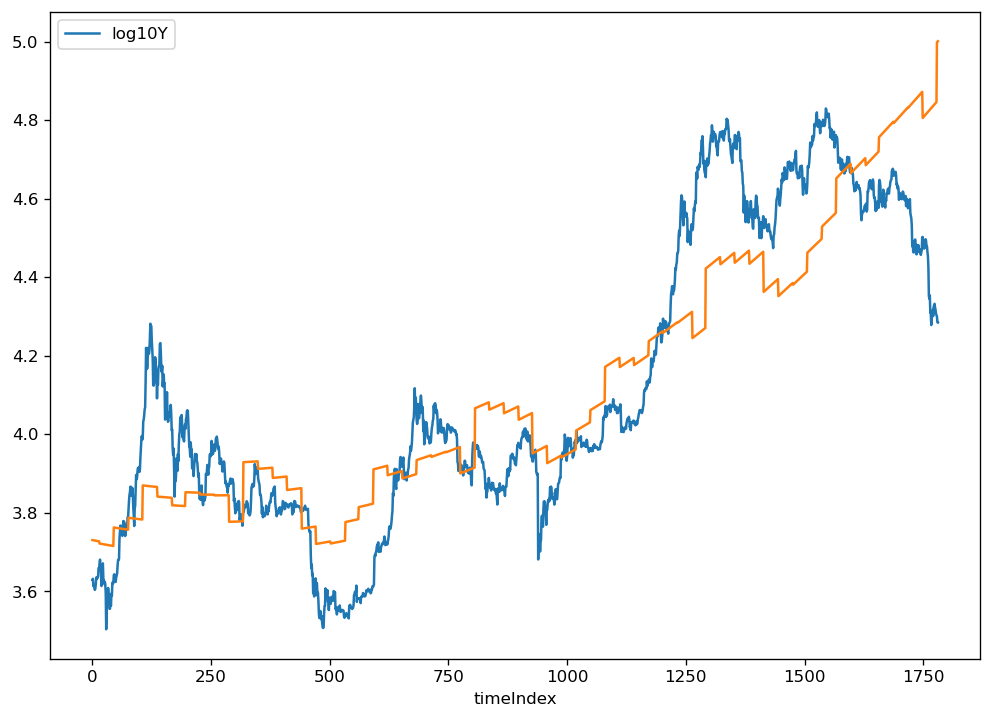

In [220]:
# Ploteamos los resultados de la predicción:

df16_train.plot(kind = "line", x = "timeIndex", y = "log10Y")
plt.plot(df16_train.timeIndex, model_trend_est_pred_train, '-');

In [221]:
# Veamos las predicciones del modelo sobre el set de testeo:

model_trend_est_pred_test = model_trend_est.predict(df16_test[["timeIndex", "timeIndex_sq",\
                                                               "t1", "t2", "t3", "t4",\
                                                                "t5", "t6", "t7",\
                                                                "t8", "t9", "t10", "t11",\
                                                                "t12", "t13", "t14", "t15"]])
model_trend_est_pred_test[-5:]

time
2023-01-14    5.060175
2023-01-15    5.061765
2023-01-16    5.063357
2023-01-17    5.064949
2023-01-18    5.066543
dtype: float64

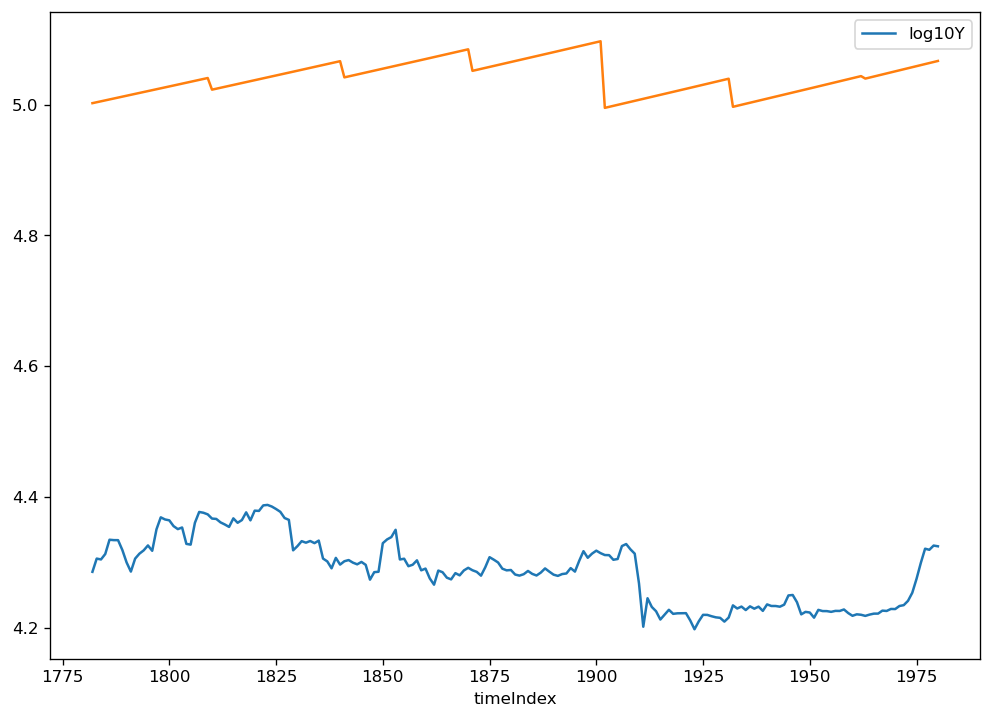

In [222]:
# Ploteamos los resultados de la predicción:

df16_test.plot(kind = "line", x = "timeIndex", y = "log10Y")
plt.plot(df16_test.timeIndex, model_trend_est_pred_test, '-');

## Volvemos a predecir el modelo pero en escala lineal

In [223]:
# Ahora fiteamos nuestro modelo de regresión lineal entre value y timeIndex + timeIndex_sq
# más las dummies de mes

model_trend_est = smf.ols('price ~ timeIndex + timeIndex_sq + t1 + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9 + t10 + t11 + t12 + t13 + t14 + t15',\
                          data = df16_train).fit()

In [224]:
# Veamos las predicciones del modelo sobre el set de entrenamiento:

model_trend_est_pred_train = model_trend_est.predict(df16_train[["timeIndex", "timeIndex_sq",\
                                                               "t1", "t2", "t3", "t4",\
                                                                "t5", "t6", "t7",\
                                                                "t8", "t9", "t10", "t11",\
                                                                "t12", "t13", "t14", "t15"]])
model_trend_est_pred_train[-5:]

time
2022-06-29    51916.750613
2022-06-30    51985.240499
2022-07-01    62288.831387
2022-07-02    62357.415790
2022-07-03    62426.047452
dtype: float64

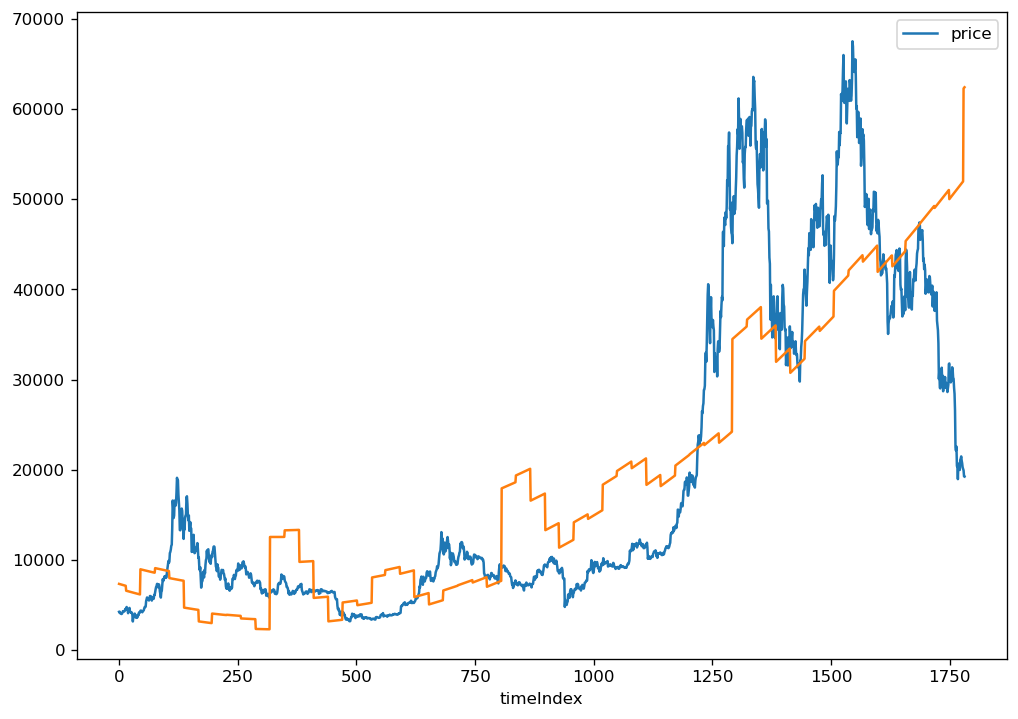

In [225]:
# Ploteamos los resultados de la predicción:

df16_train.plot(kind = "line", x = "timeIndex", y = "price")
plt.plot(df16_train.timeIndex, model_trend_est_pred_train, '-');

In [226]:
# Veamos las predicciones del modelo sobre el set de testeo:

model_trend_est_pred_test = model_trend_est.predict(df16_test[["timeIndex", "timeIndex_sq",\
                                                               "t1", "t2", "t3", "t4",\
                                                                "t5", "t6", "t7",\
                                                                "t8", "t9", "t10", "t11",\
                                                                "t12", "t13", "t14", "t15"]])
model_trend_est_pred_test[-5:]

time
2023-01-14    68435.049963
2023-01-15    68512.944304
2023-01-16    68590.885904
2023-01-17    68668.874763
2023-01-18    68746.910880
dtype: float64

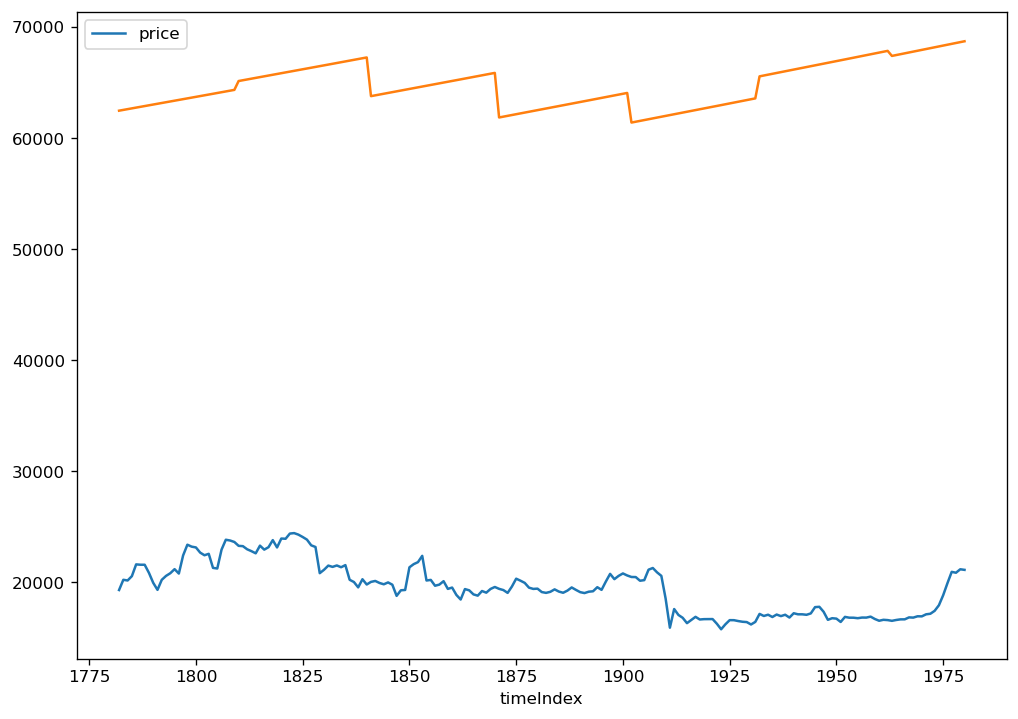

In [227]:
# Ploteamos los resultados de la predicción:

df16_test.plot(kind = "line", x = "timeIndex", y = "price")
plt.plot(df16_test.timeIndex, model_trend_est_pred_test, '-');

In [229]:
# Calculamos el error:

df16_test["Trend_Est"] = model_trend_est_pred_test
df16_test.head()

,price,Month,log10Y,trimestre,year,trimestre16,t1,t2,t3,t4,...,t9,t10,t11,t12,t13,t14,t15,timeIndex,timeIndex_sq,Trend_Est
time,,,,,,,,,,,,,,,,,,,,,
2022-07-04,19315.83,7,4.285913,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,1,1782,3175524,62494.726372
2022-07-05,20236.71,7,4.306140,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,1,1783,3179089,62563.452551
2022-07-06,20175.84,7,4.304832,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,1,1784,3182656,62632.225989
2022-07-07,20564.51,7,4.313118,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,1,1785,3186225,62701.046685
2022-07-08,21624.99,7,4.334956,3,2022,15,0,0,0,0,...,0,0,0,0,0,0,1,1786,3189796,62769.914639


In [230]:
model_trend_est_RMSE = RMSE(df16_test.Trend_Est, df16_test.price)
model_trend_est_RMSE

45377.623978569645

In [231]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior
df_Results.loc[4, "Model"] = "Trend_Est"
df_Results.loc[4, "RMSE"] = model_trend_est_RMSE
df_Results

,Model,RMSE
0,Mean,2293.293648
1,RandomWalk,2306.653727
2,LinearTrend,25984.982446
3,QuadraticTrend,41780.074038
4,Trend_Est,45377.623979
